**Dependecies: Add your Dependencies here**

In [100]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']= 10,10

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Utility Function to plot ROC-AUC Curve

In [101]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Read the dataset from the CSV file

In [102]:
dataset = pd.read_csv('/content/credit_scoring_sample.csv',na_values='')
dataset.head()

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,0,454.000000,21,0,0,0,NaN,NaN
1,1,0.174377,22,1,1,1,280.0,0.0
2,0,0.000000,22,0,0,0,1500.0,0.0
3,1,0.000000,23,98,98,98,NaN,0.0
4,1,111.000000,23,0,1,2,NaN,0.0


Plot Distrubution of the target variable before removing NaN Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


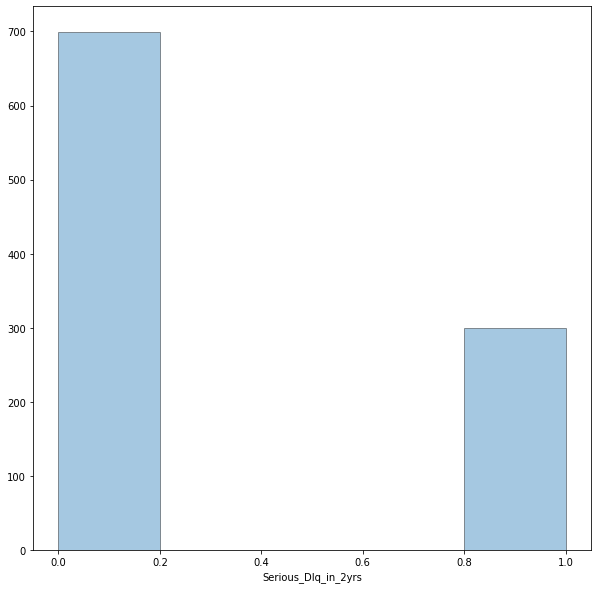

In [104]:
sns.distplot(dataset['Serious_Dlq_in_2yrs'],hist=True,kde=False,bins=5,hist_kws={'edgecolor':'black'})

Plot Distrubution of data for each feature before removing NaN Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


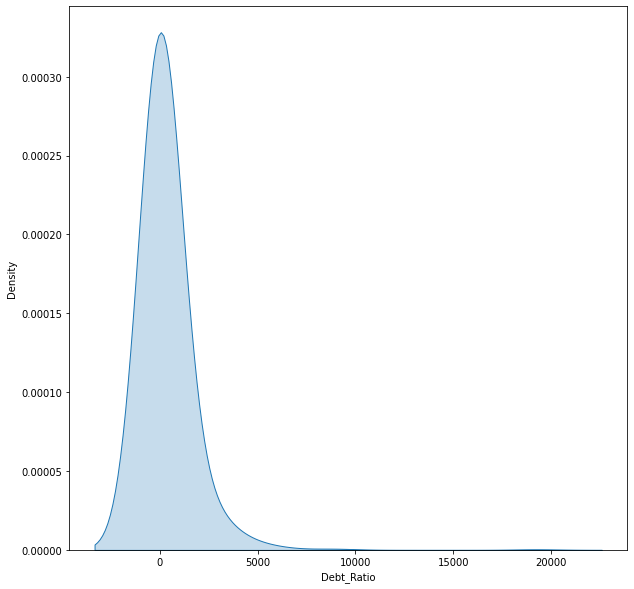

In [105]:
sns.kdeplot(dataset['Debt_Ratio'],bw=1,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


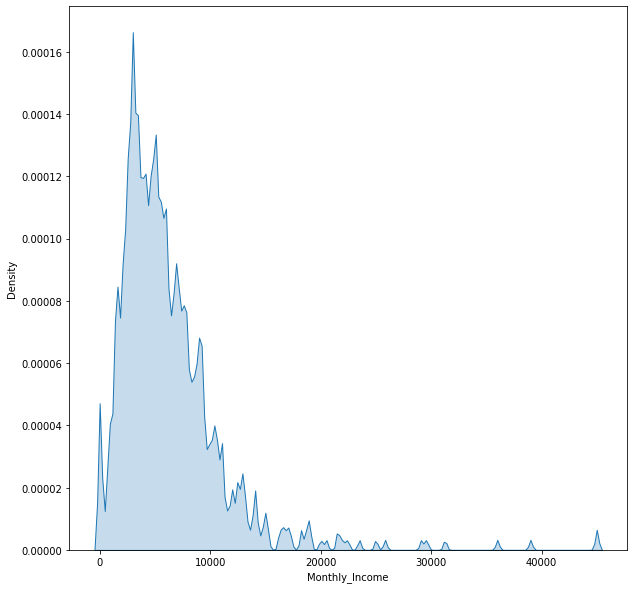

In [106]:
sns.kdeplot(dataset['Monthly_Income'],bw=0.03125,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


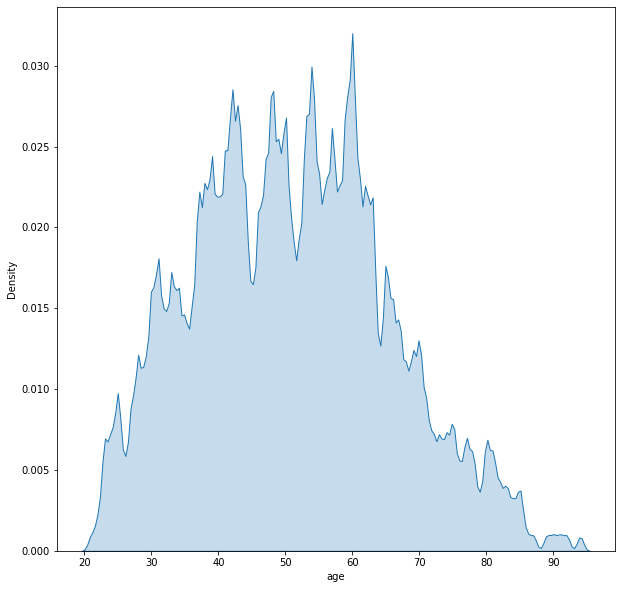

In [107]:
sns.kdeplot(dataset['age'],bw=0.03125,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


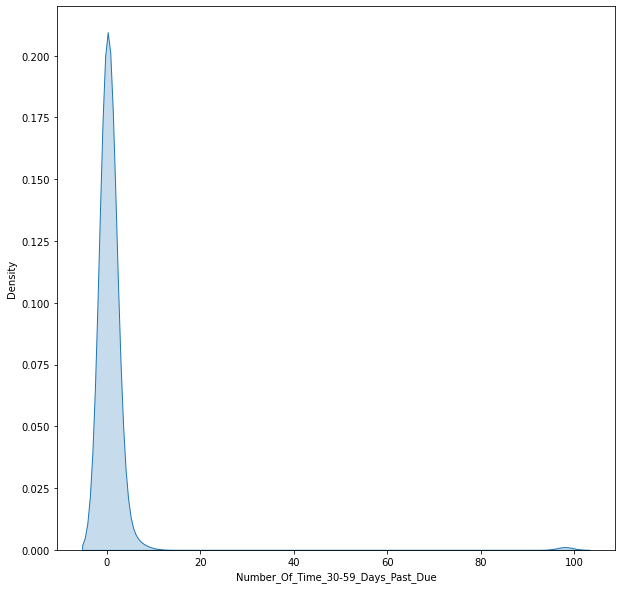

In [108]:
sns.kdeplot(dataset['Number_Of_Time_30-59_Days_Past_Due'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


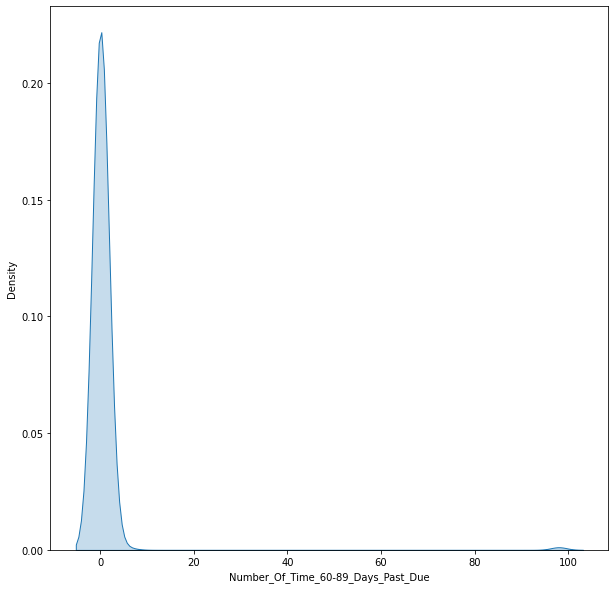

In [109]:
sns.kdeplot(dataset['Number_Of_Time_60-89_Days_Past_Due'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


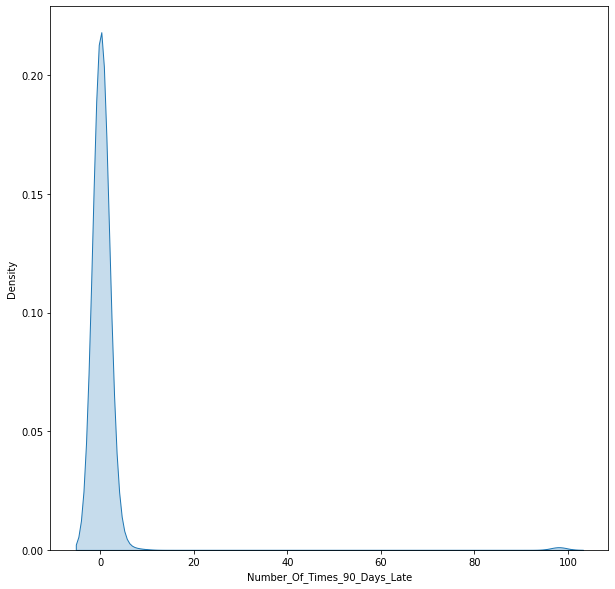

In [110]:
sns.kdeplot(dataset['Number_Of_Times_90_Days_Late'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.0625 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


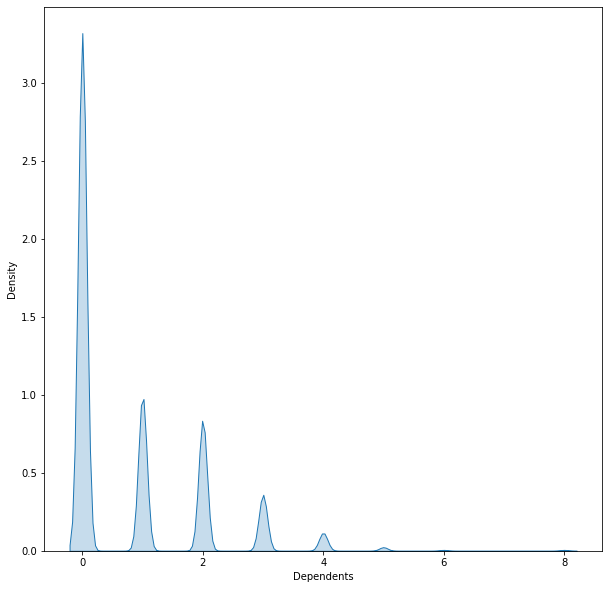

In [111]:
sns.kdeplot(dataset['Dependents'],bw=0.0625,fill=True)

Handle the NaN values

813


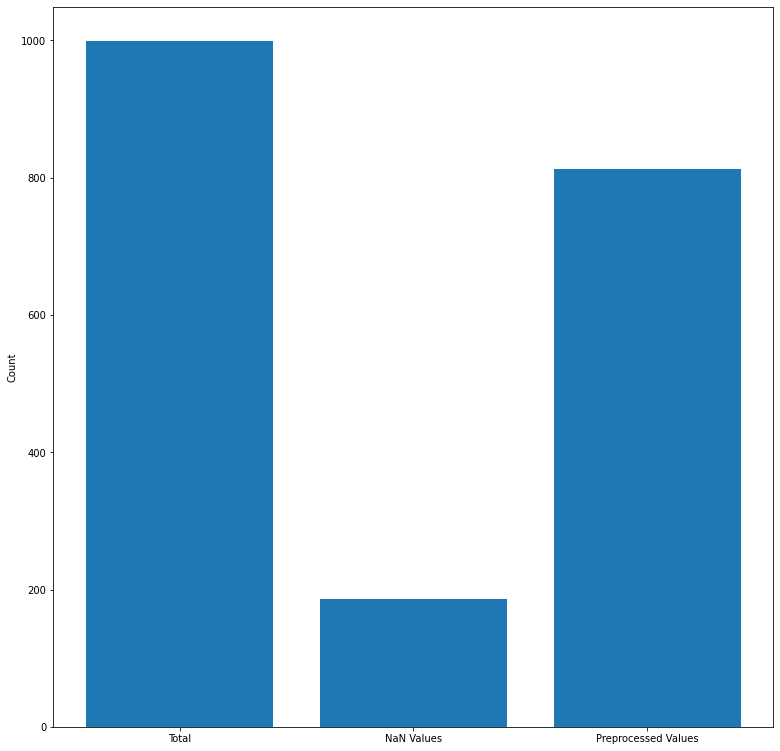

In [112]:
original = dataset["Serious_Dlq_in_2yrs"].count()
dataset = dataset.dropna()
preprocessed = dataset["Serious_Dlq_in_2yrs"].count()
NaN_values = original-preprocessed
print(preprocessed)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylabel("Count")
category = ['Total','NaN Values','Preprocessed Values']
values = [original,NaN_values,preprocessed]
ax.bar(category,values)
plt.show()

Plot Distrubution of the target variable after removing NaN Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


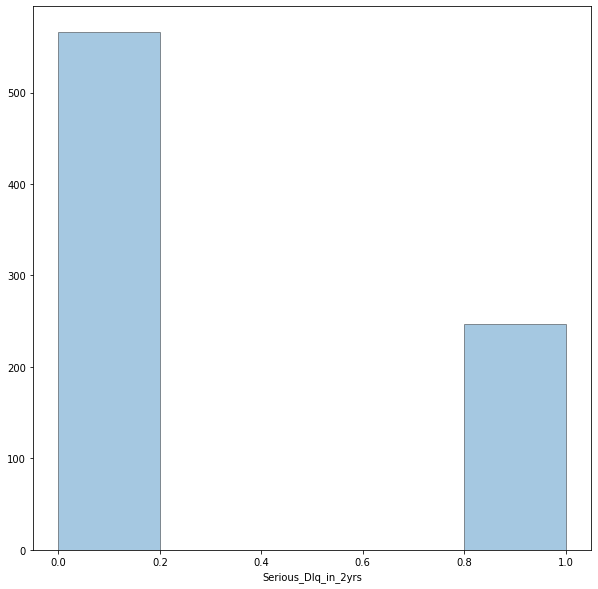

In [113]:
sns.distplot(dataset['Serious_Dlq_in_2yrs'],hist=True,kde=False,bins=5,hist_kws={'edgecolor':'black'})

Visualize the distribution of data for every feature after removing NaN Values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


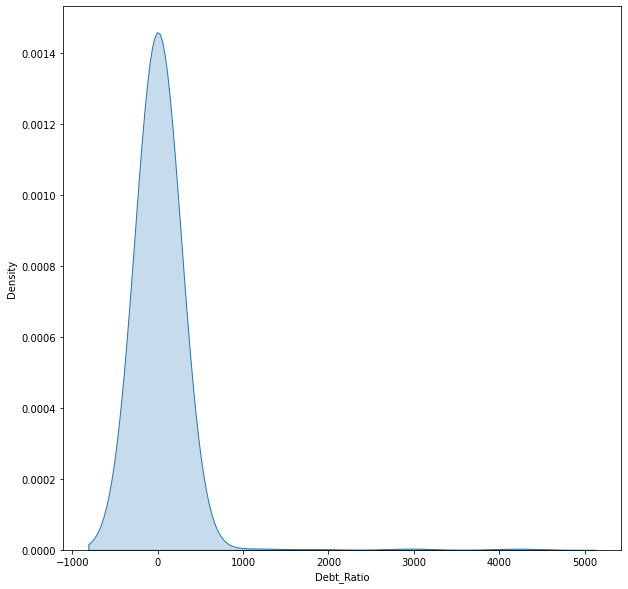

In [114]:
sns.kdeplot(dataset['Debt_Ratio'],bw=1,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


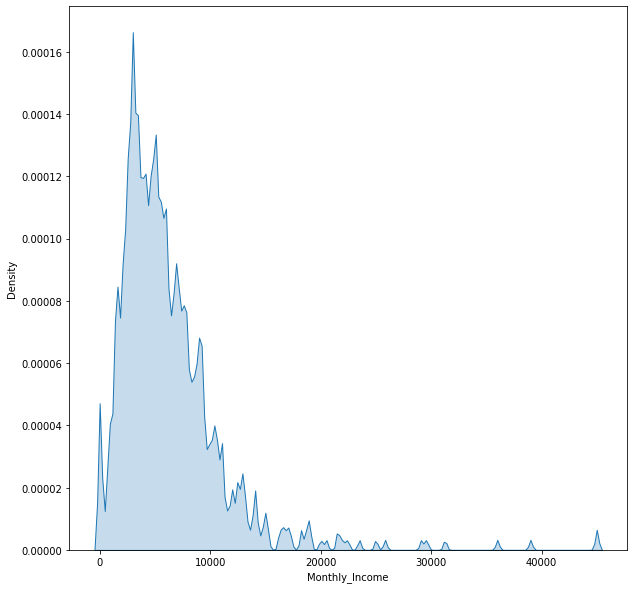

In [115]:
sns.kdeplot(dataset['Monthly_Income'],bw=0.03125,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03125 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


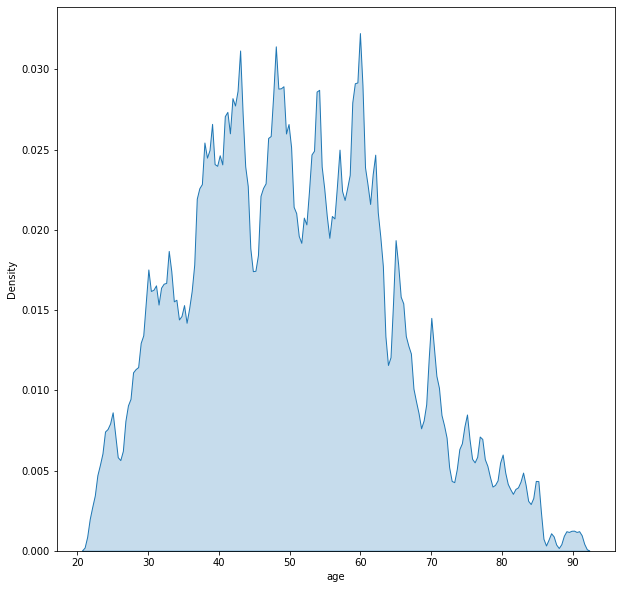

In [116]:
sns.kdeplot(dataset['age'],bw=0.03125,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


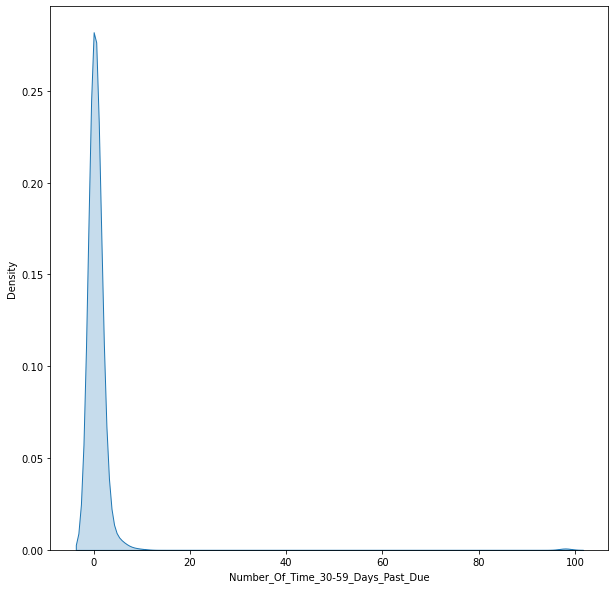

In [117]:
sns.kdeplot(dataset['Number_Of_Time_30-59_Days_Past_Due'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


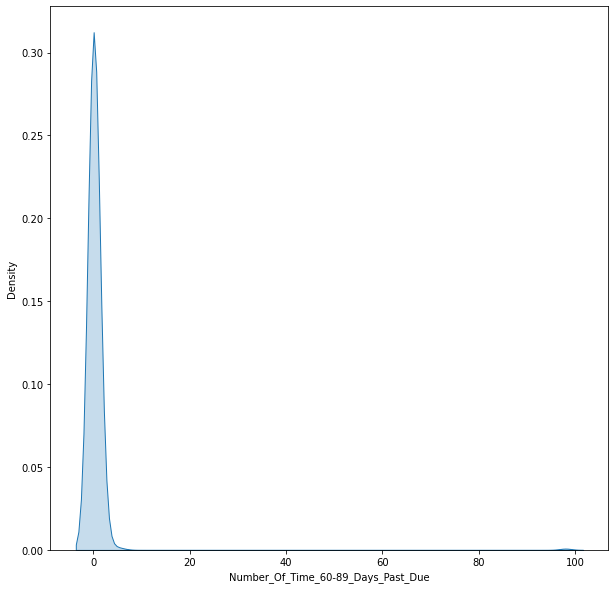

In [118]:
sns.kdeplot(dataset['Number_Of_Time_60-89_Days_Past_Due'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


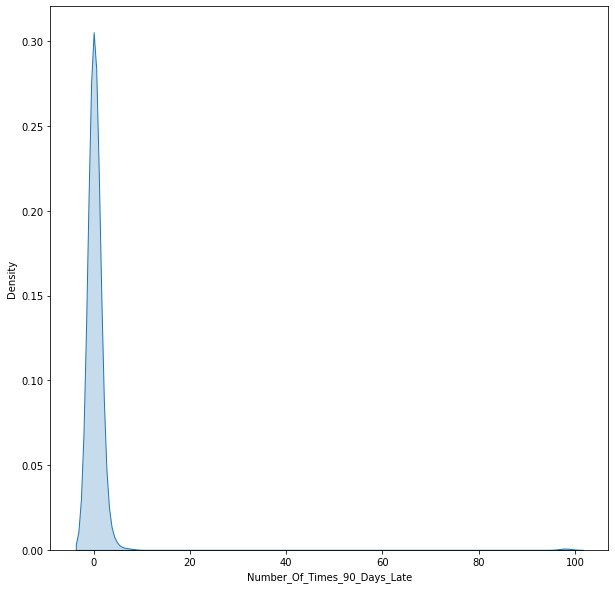

In [119]:
sns.kdeplot(dataset['Number_Of_Times_90_Days_Late'],bw=0.25,fill=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.0625 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


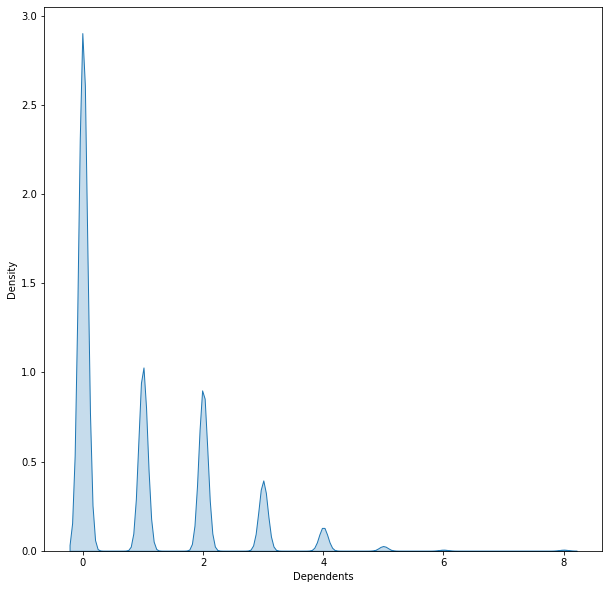

In [120]:
sns.kdeplot(dataset['Dependents'],bw=0.0625,fill=True)

Seperate depedendent and independent variables from the dataset

In [121]:
X = ['Debt_Ratio','age','Number_Of_Time_30-59_Days_Past_Due','Number_Of_Time_60-89_Days_Past_Due','Number_Of_Times_90_Days_Late','Monthly_Income','Dependents']
Y = ['Serious_Dlq_in_2yrs']

x_pred = data[X]
y_pred = data[Y]

Splitting into Train and Test Portions using Stratified K Fold

In [122]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
split=skf.split(dataset[X],dataset[Y])
for train_index, test_index in split:
    X_train, X_test = dataset[X].iloc[train_index], dataset[X].iloc[test_index]
    Y_train, Y_test = dataset[Y].iloc[train_index], dataset[Y].iloc[test_index]

**Train the Random Forest Classifier**

Define parameters for the random forest

In [123]:
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [2,3,4,5]}
rf = RandomForestClassifier(n_estimators=100)

Constructing Random Forests, according to varying combinations of parameters

In [124]:
rfs=[]
for i in parameters['min_samples_leaf']:
  for j in parameters['max_depth']:
    for k in parameters['max_features']:
      rfa = RandomForestClassifier(n_estimators=100,max_depth=j,max_features=k,min_samples_leaf=i)
      rfs.append([rfa,i,j,k])

Perform cross validation and showing details for each Random Forest Model, differed by parameters

   Cross_validation_score
0                0.778626
1                0.761538
2                0.823077
3                0.753846
4                0.730769
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 3 :- 0.7695713446858485
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 3 :- 0.030861774917823867
 
   Cross_validation_score
0                0.763359
1                0.761538
2                0.846154
3                0.776923
4                0.746154
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 3 :- 0.7788256018790369
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 3 :- 0.0350491755771796
 
   Cross_validation_score
0                0.755725
1                0.769231
2                0.861538
3                0.753846
4                0.784615
 
Mean of Cross Valida

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.769231
2                0.807692
3                0.753846
4                0.769231
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 5 :- 0.771145038167939
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 5 :- 0.019391002301167123
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.748092
1                0.753846
2                0.815385
3                0.738462
4                0.723077
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 5 :- 0.7557721667645332
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 5 :- 0.031575247986993196
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.748092
1                0.761538
2                0.807692
3                0.746154
4                0.761538
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 5 :- 0.7650029359953023
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 5 :- 0.022305465662618467
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.648855
1                0.761538
2                0.784615
3                0.753846
4                0.800000
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 5 :- 0.7497709923664122
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 5 :- 0.0530588548117399
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.763359
1                0.746154
2                0.823077
3                0.761538
4                0.730769
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 7 :- 0.7649794480328831
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 7 :- 0.03135131836209919
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.761538
2                0.838462
3                0.761538
4                0.746154
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 7 :- 0.7757369348209042
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 7 :- 0.03235811877550025
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.769231
2                0.815385
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 4, min samples = 7 :- 0.7772753963593658
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 4, min samples = 7 :- 0.020521006794977148
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.786260
1                0.761538
2                0.838462
3                0.761538
4                0.738462
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 1, min samples = 7 :- 0.7772519083969466
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 1, min samples = 7 :- 0.03413582839062409
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.763359
1                0.746154
2                0.823077
3                0.746154
4                0.746154
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 2, min samples = 7 :- 0.7649794480328831
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 2, min samples = 7 :- 0.02980319792956251
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.769231
2                0.815385
3                0.753846
4                0.800000
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 4, min samples = 7 :- 0.7788373458602467
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 4, min samples = 7 :- 0.024635659286664016
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.761538
2                0.838462
3                0.738462
4                0.730769
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 1, min samples = 7 :- 0.7649911920140928
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 1, min samples = 7 :- 0.038394366987026605
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.763359
1                0.761538
2                0.838462
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 2, min samples = 7 :- 0.7788256018790369
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 2, min samples = 7 :- 0.030731434070035046
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.725191
1                0.761538
2                0.807692
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 7 :- 0.7650381679389312
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 7 :- 0.027151226094640338
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.748092
1                0.753846
2                0.776923
3                0.753846
4                0.730769
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 7 :- 0.7526952436876101
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 7 :- 0.014775524635404564
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.748092
1                0.746154
2                0.807692
3                0.738462
4                0.769231
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 7 :- 0.7619260129183794
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 7 :- 0.025054528151265392
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.748092
1                0.761538
2                0.807692
3                0.753846
4                0.792308
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 7 :- 0.77269524368761
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 7 :- 0.023214408189978653
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.793893
1                0.761538
2                0.800000
3                0.761538
4                0.715385
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 9 :- 0.7664709336465062
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 1, min samples = 9 :- 0.030115263925708013
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.761538
2                0.846154
3                0.769231
4                0.761538
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 9 :- 0.7818907809747504
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 2, min samples = 9 :- 0.03236426021530801
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.761538
2                0.838462
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 2, max features = 4, min samples = 9 :- 0.7803523194362889
 
Standard Deviation of Cross Validation Scores of Model with max depth = 2, max features = 4, min samples = 9 :- 0.03010843012793276
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.786260
1                0.761538
2                0.830769
3                0.769231
4                0.738462
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 1, min samples = 9 :- 0.7772519083969466
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 1, min samples = 9 :- 0.030858338069877443
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.746154
2                0.846154
3                0.746154
4                0.769231
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 2, min samples = 9 :- 0.7757369348209042
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 2, min samples = 9 :- 0.03680679500284816
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.763359
1                0.761538
2                0.807692
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 3, max features = 4, min samples = 9 :- 0.7726717557251908
 
Standard Deviation of Cross Validation Scores of Model with max depth = 3, max features = 4, min samples = 9 :- 0.0190241838721996
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.770992
1                0.753846
2                0.830769
3                0.761538
4                0.738462
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 1, min samples = 9 :- 0.7711215502055196
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 1, min samples = 9 :- 0.031669587177523655
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.786260
1                0.761538
2                0.800000
3                0.753846
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 2, min samples = 9 :- 0.775713446858485
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 2, min samples = 9 :- 0.016623048476802897
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.769231
2                0.807692
3                0.753846
4                0.800000
 
Mean of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 9 :- 0.7772988843217851
 
Standard Deviation of Cross Validation Scores of Model with max depth = 4, max features = 4, min samples = 9 :- 0.022448385846466547
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.769231
2                0.800000
3                0.761538
4                0.715385
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 9 :- 0.7603758073987082
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 1, min samples = 9 :- 0.027187034947666337
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.763359
1                0.761538
2                0.815385
3                0.738462
4                0.769231
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 9 :- 0.7695948326482677
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 2, min samples = 9 :- 0.025179008071643496
 


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


   Cross_validation_score
0                0.755725
1                0.776923
2                0.784615
3                0.746154
4                0.776923
 
Mean of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 9 :- 0.7680681150910158
 
Standard Deviation of Cross Validation Scores of Model with max depth = 5, max features = 4, min samples = 9 :- 0.014582289181956806
 


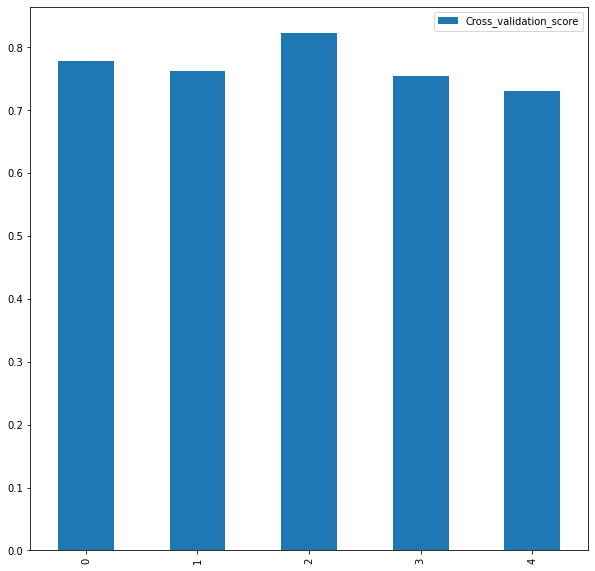

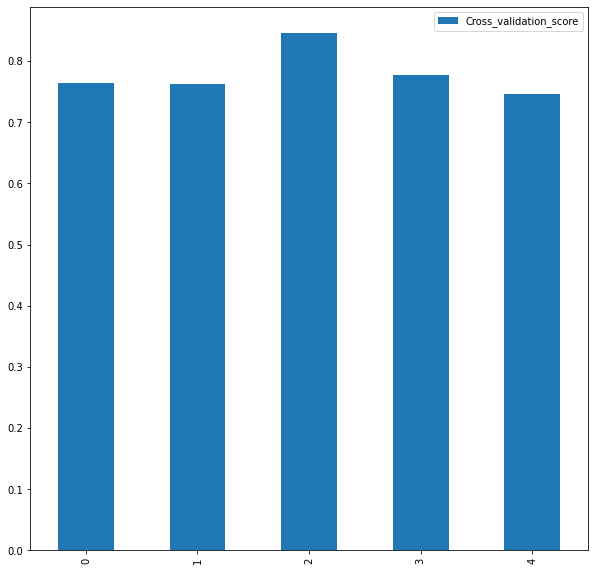

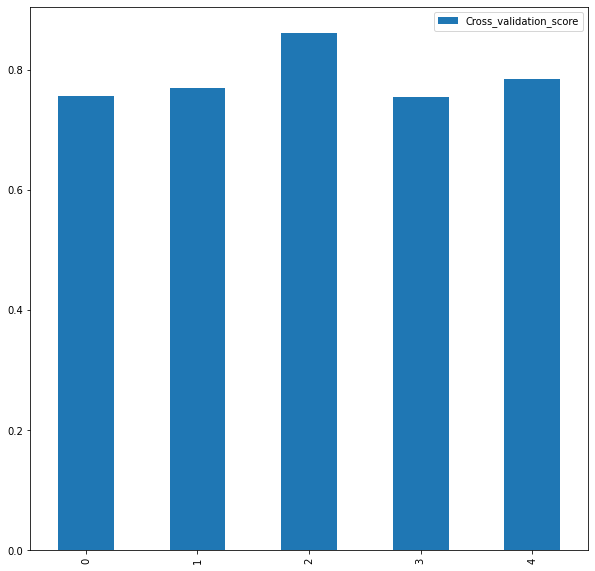

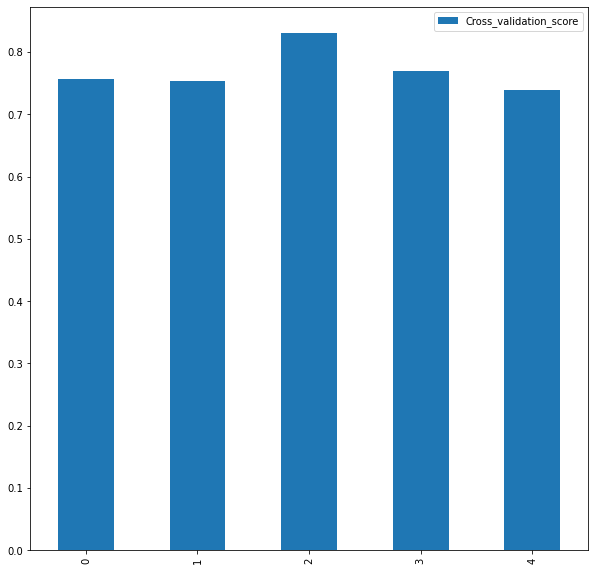

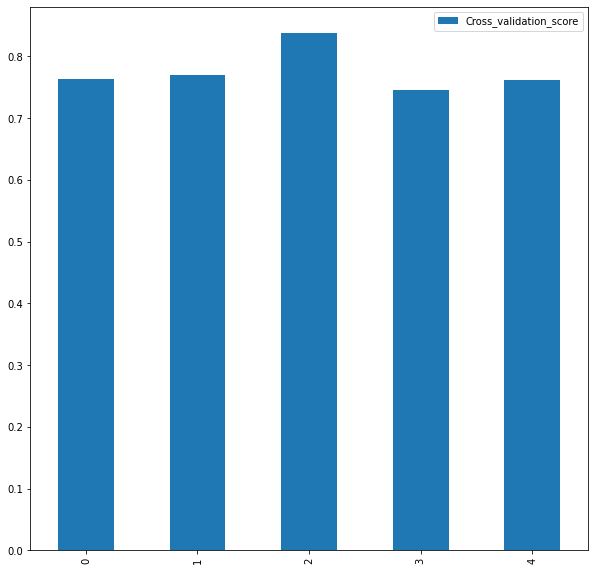

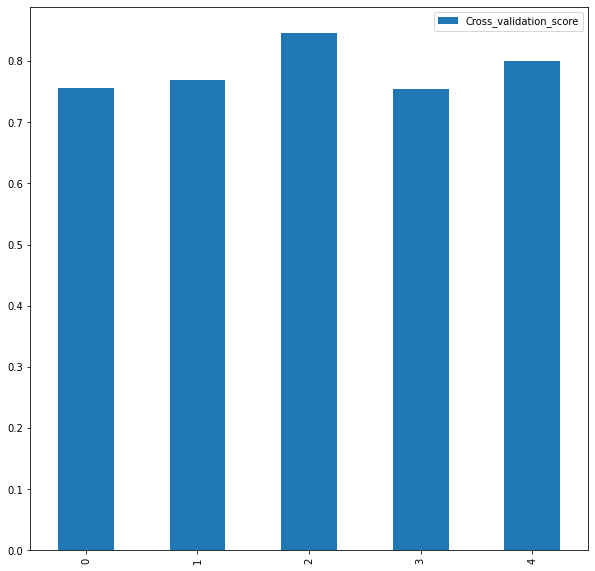

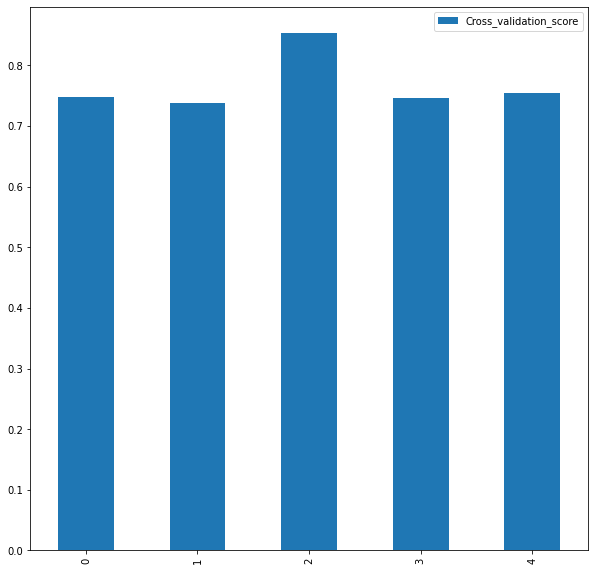

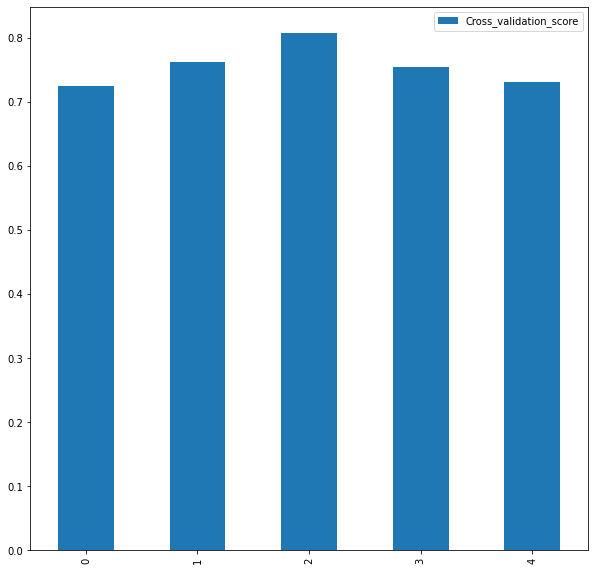

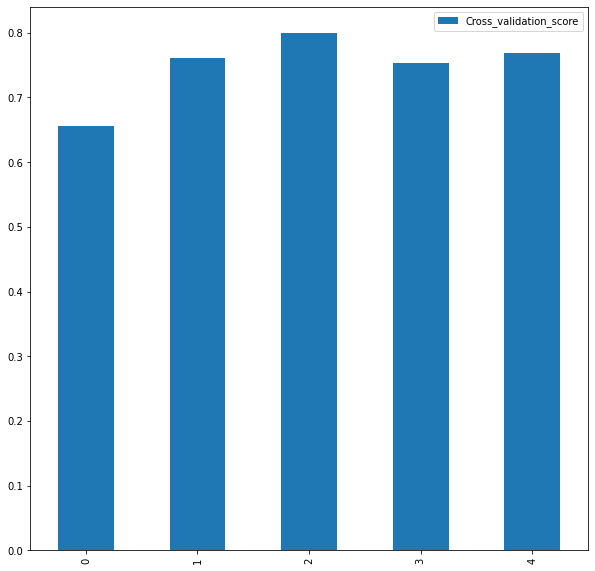

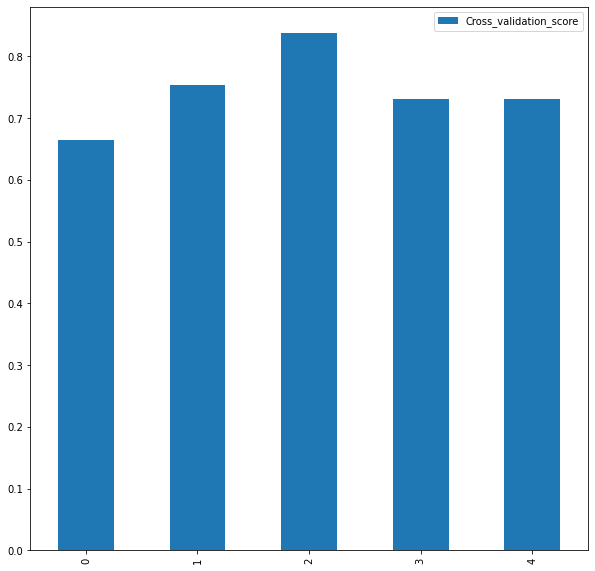

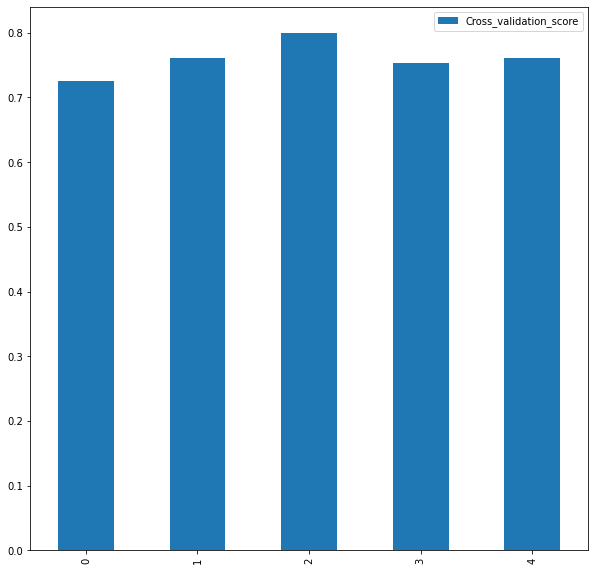

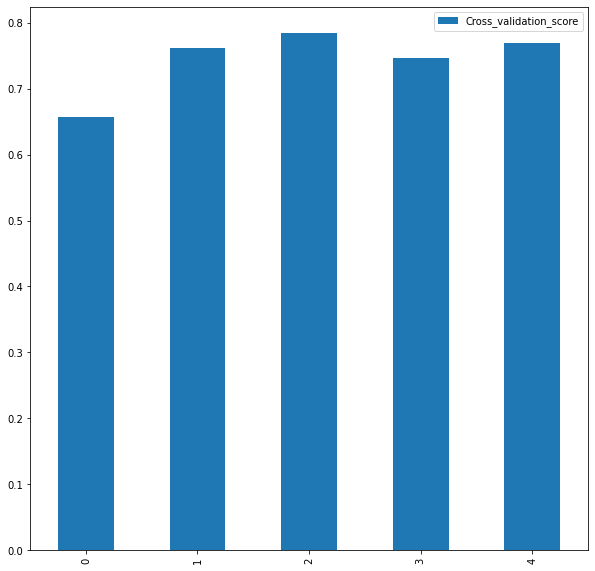

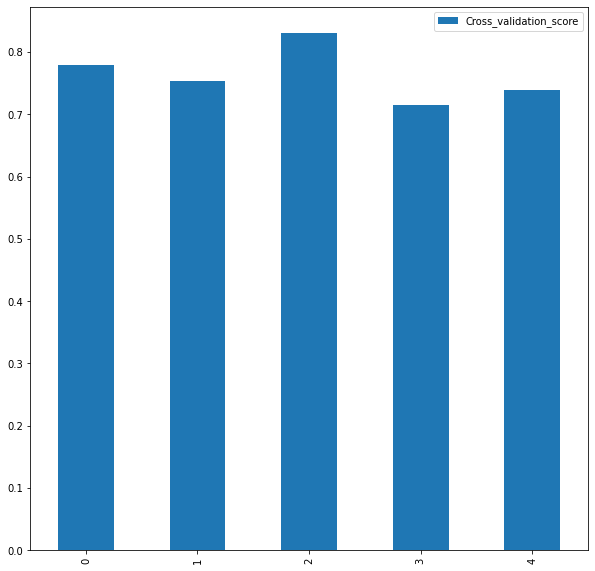

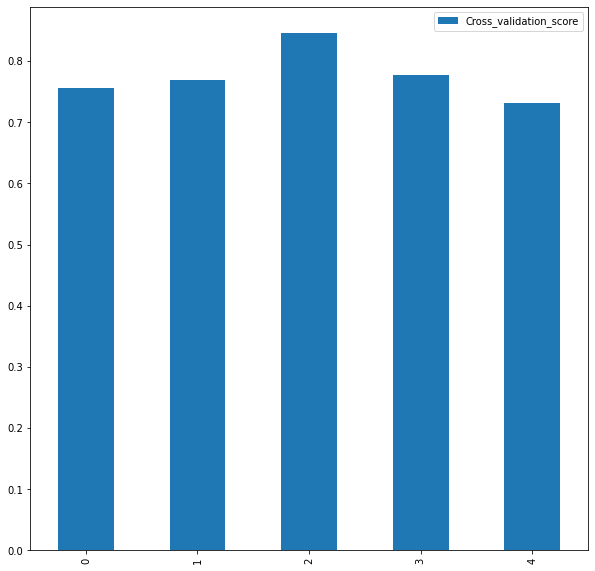

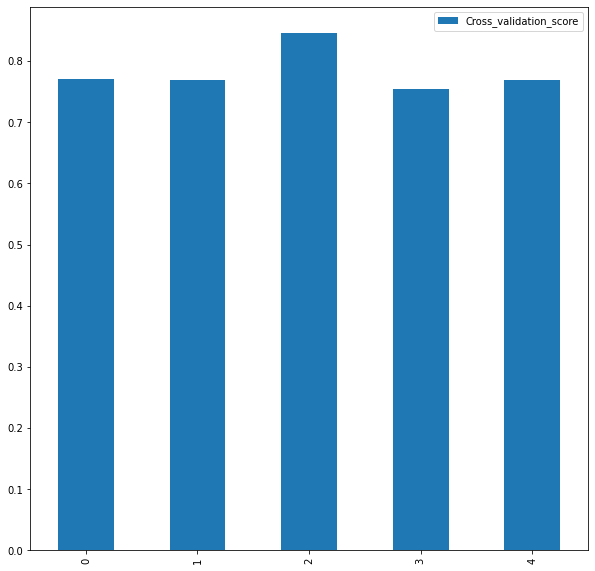

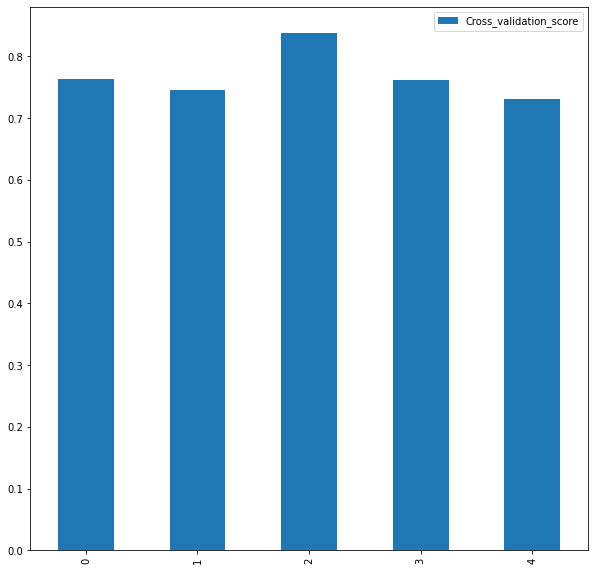

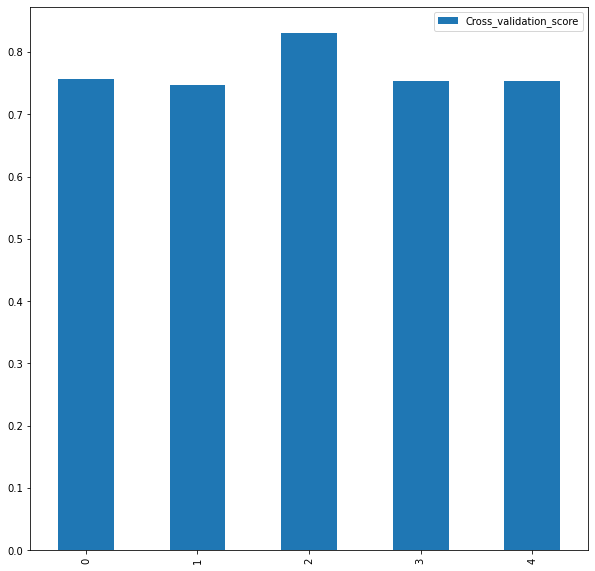

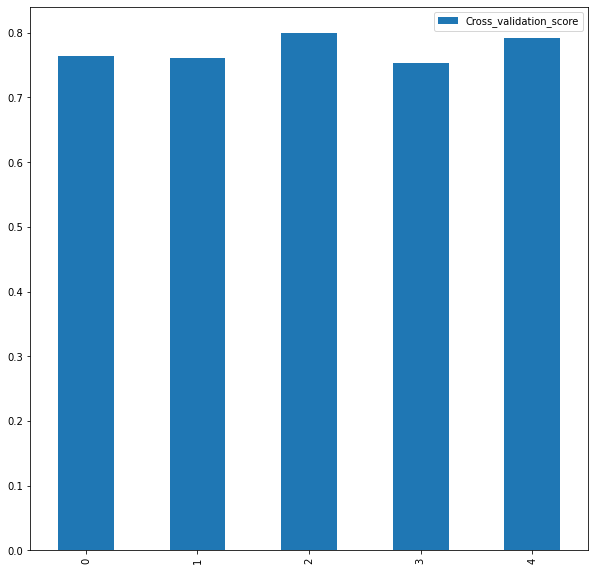

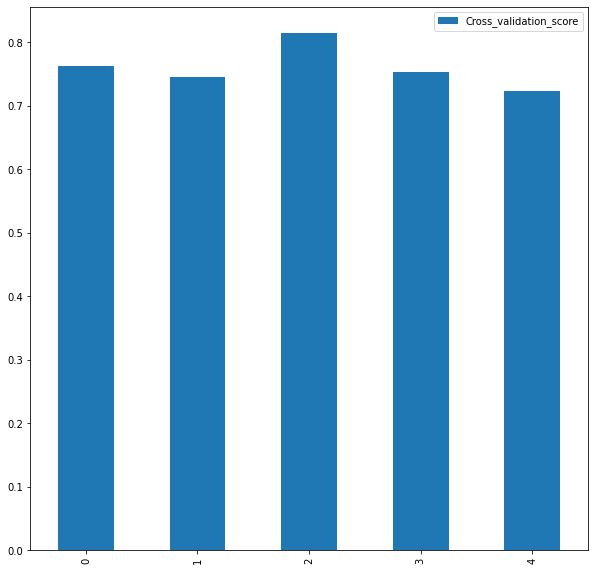

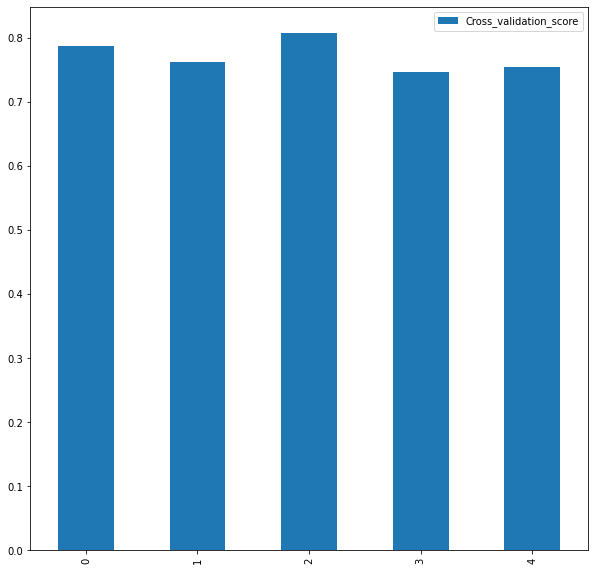

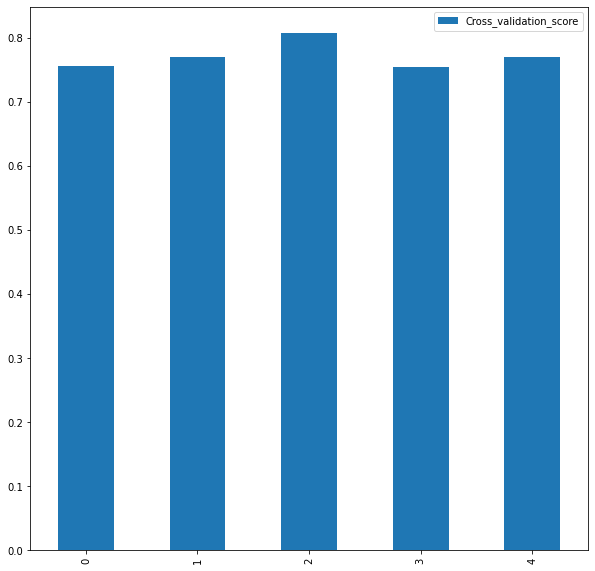

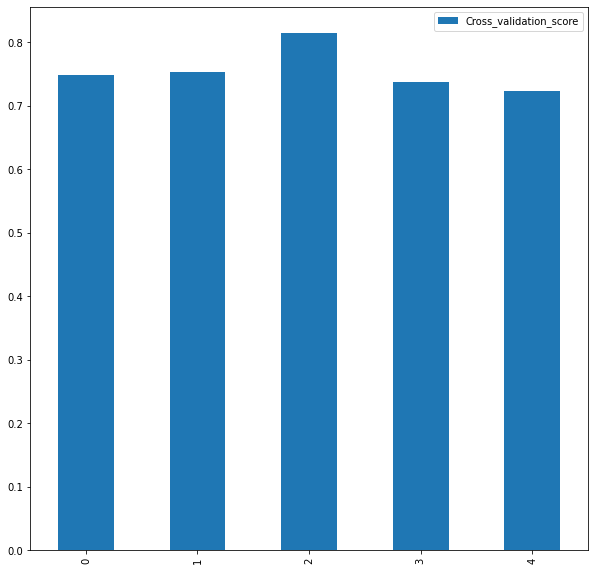

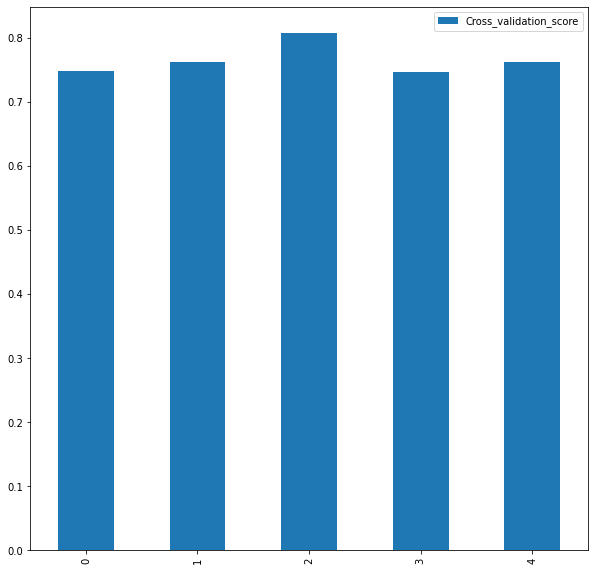

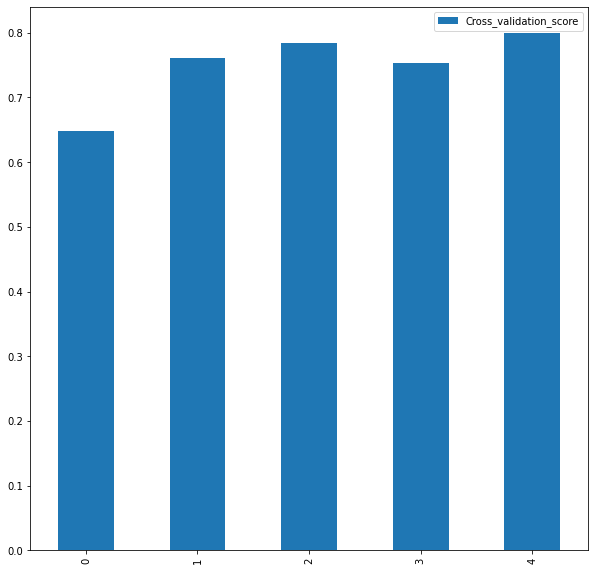

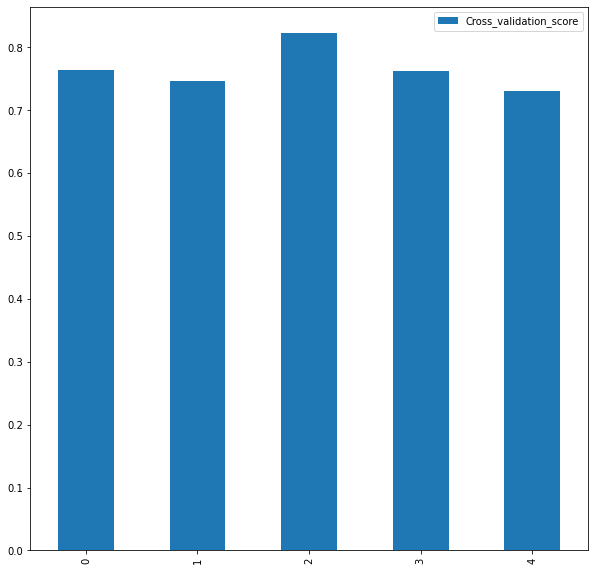

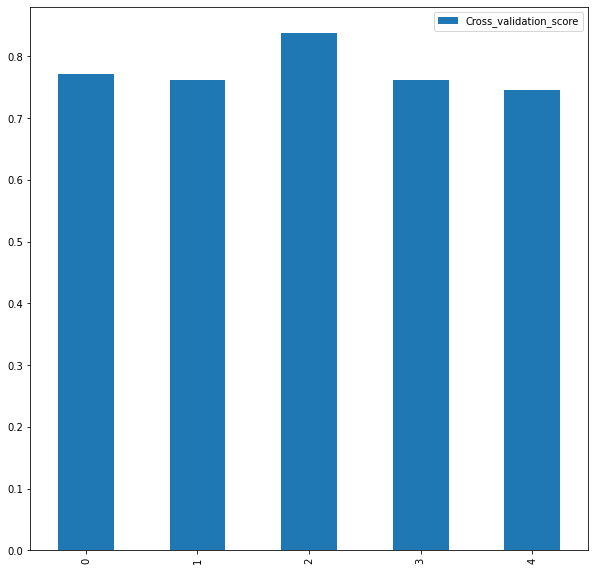

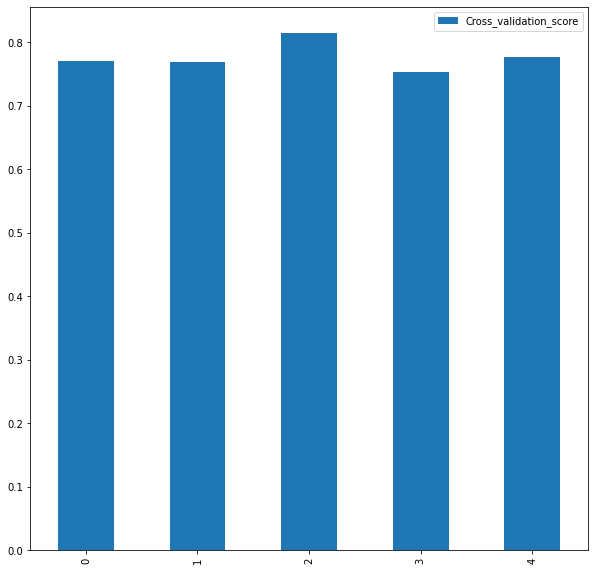

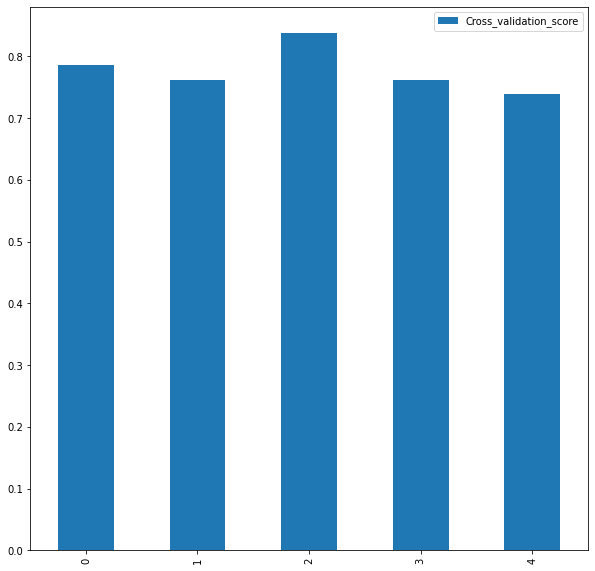

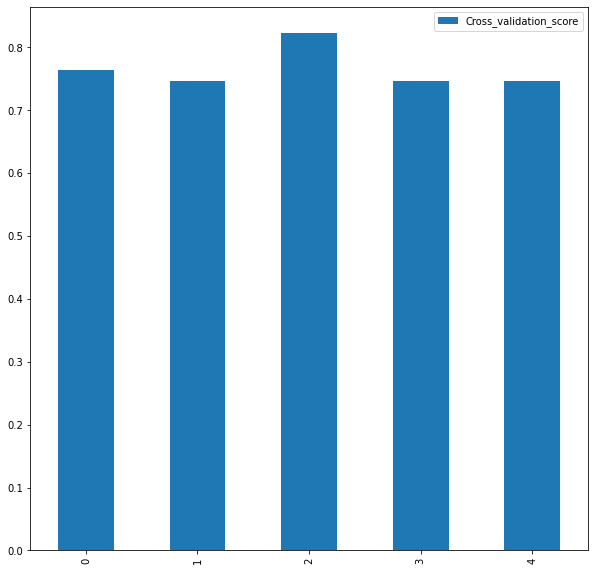

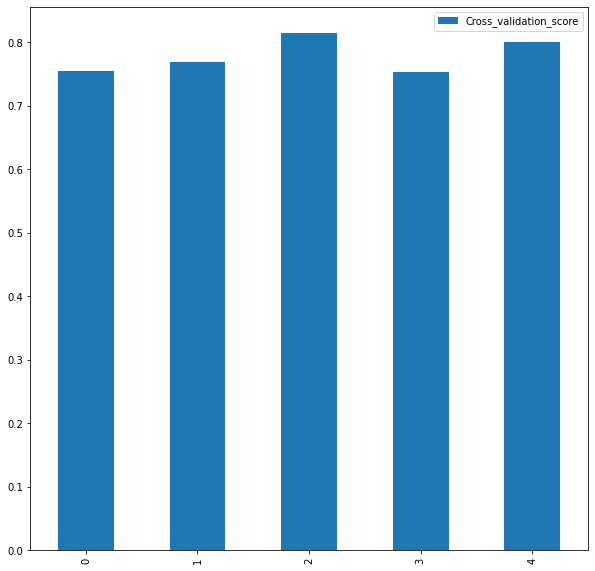

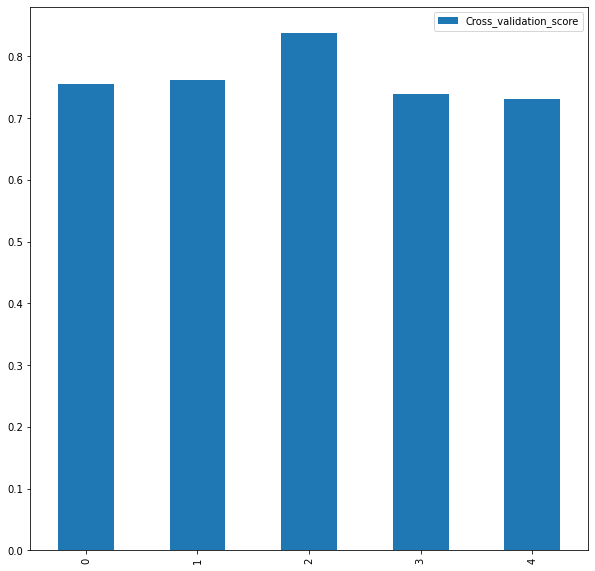

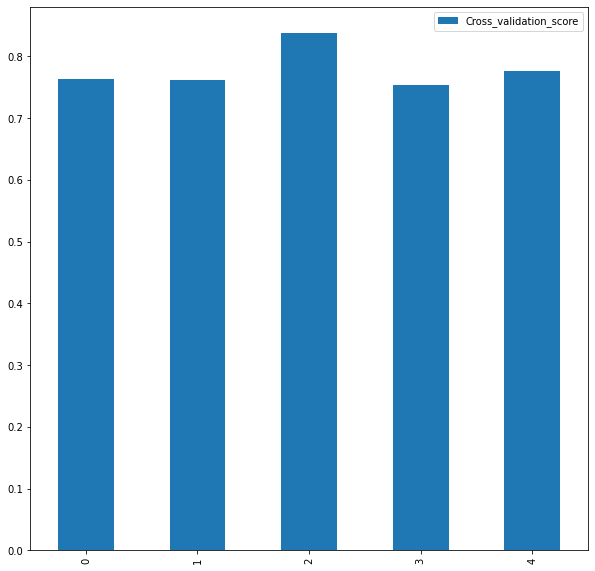

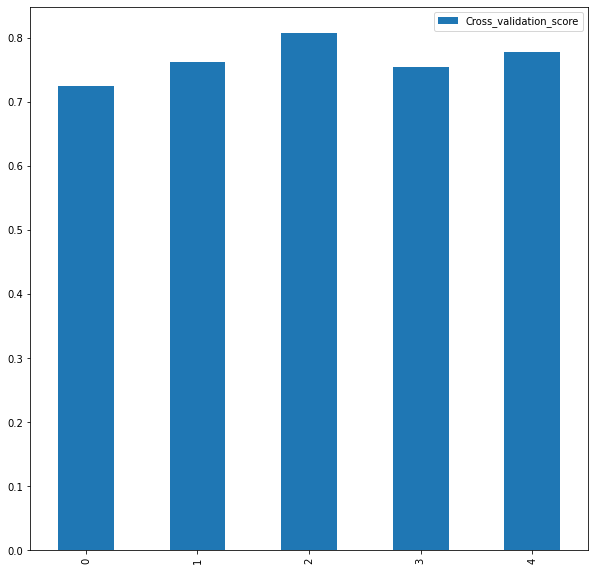

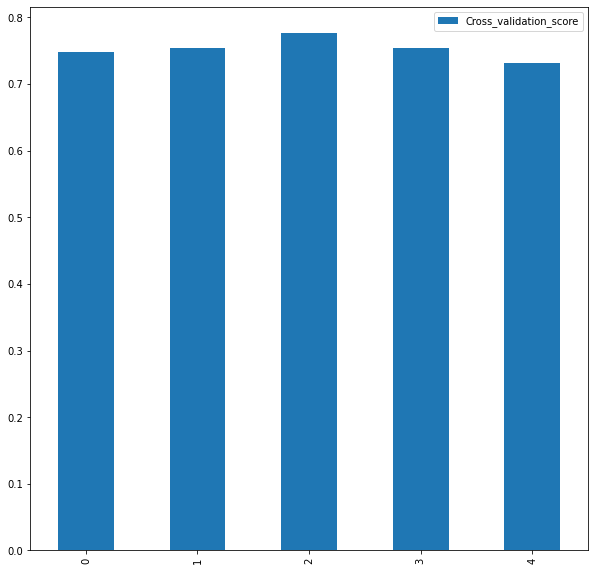

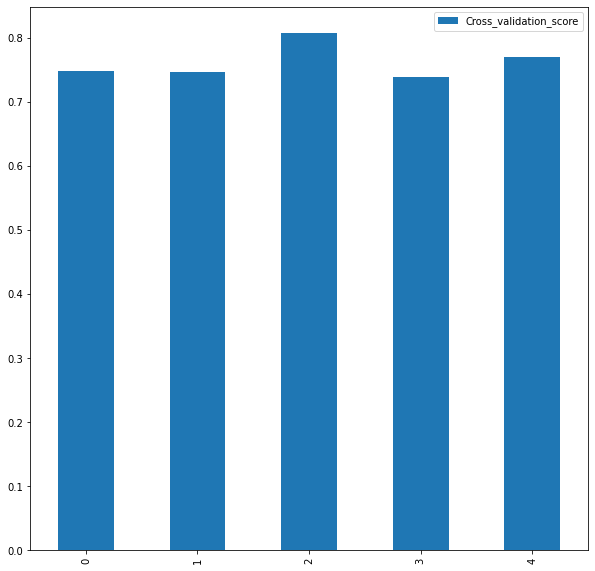

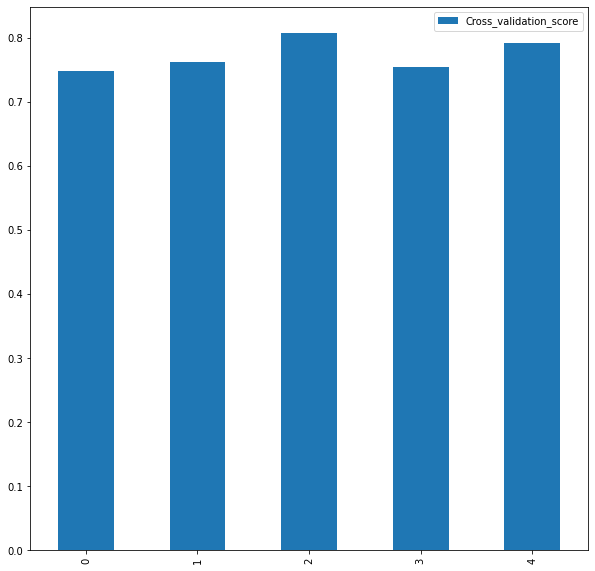

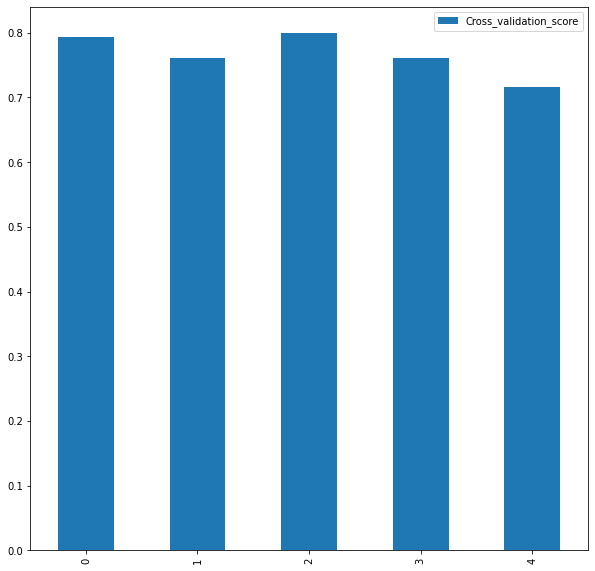

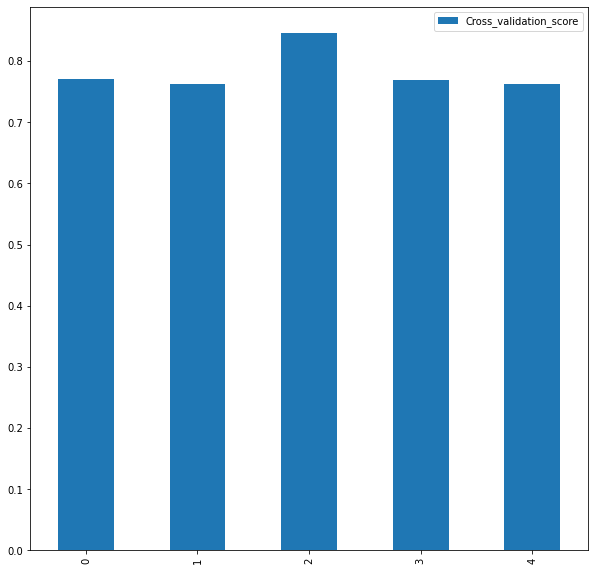

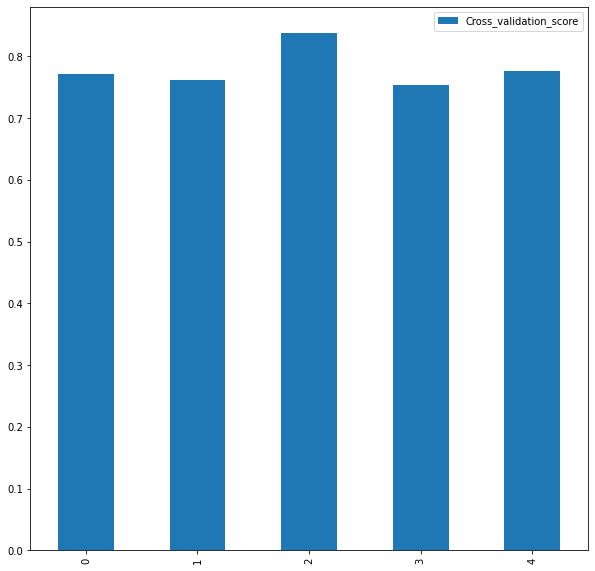

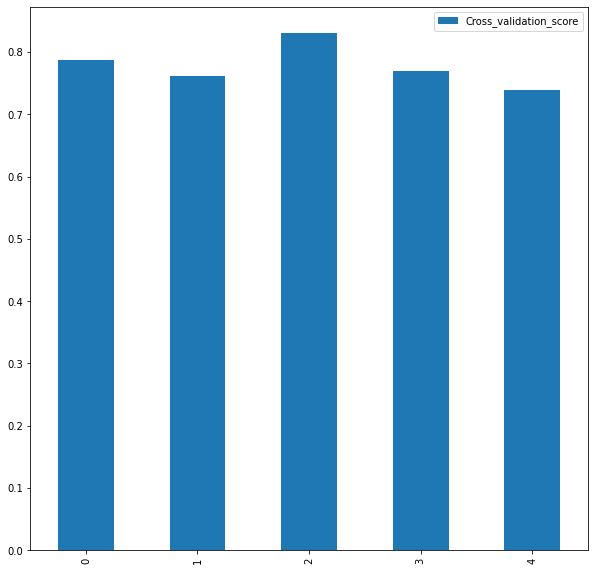

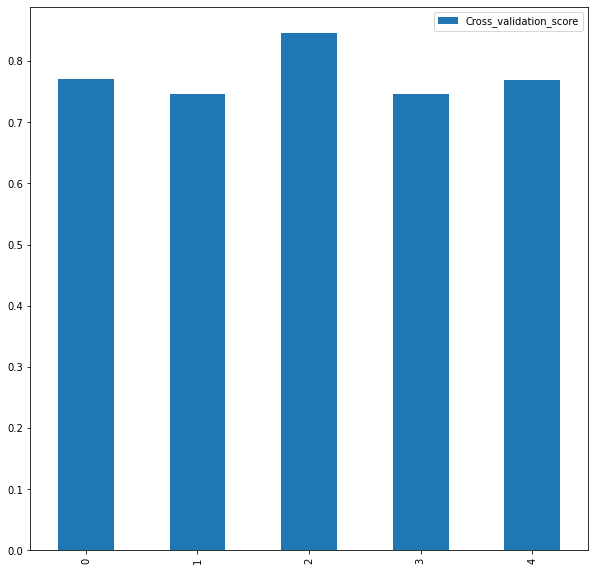

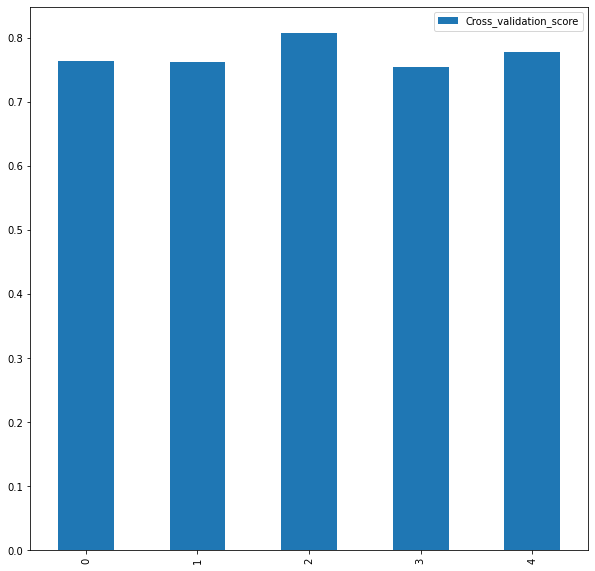

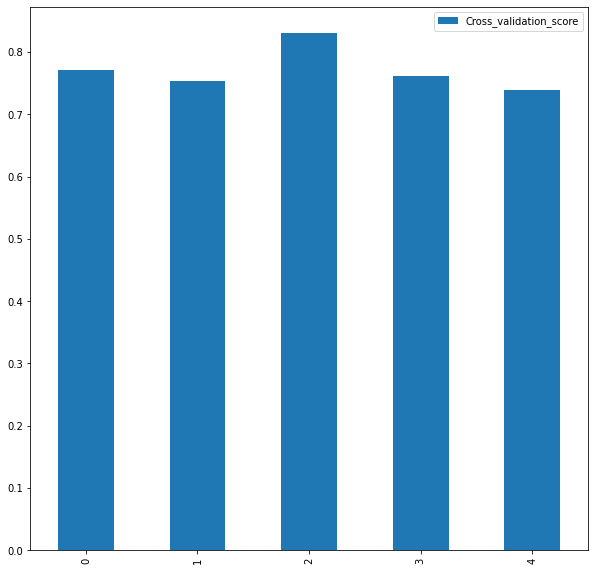

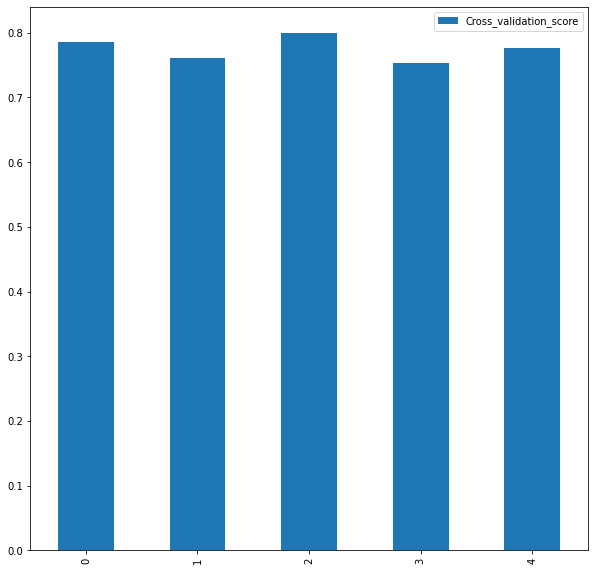

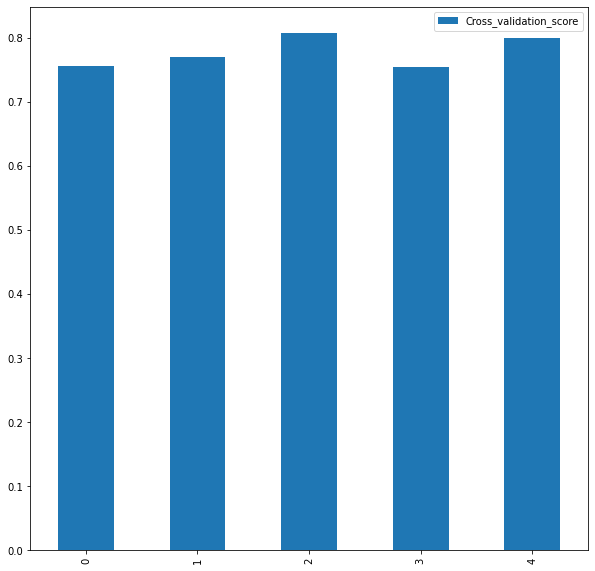

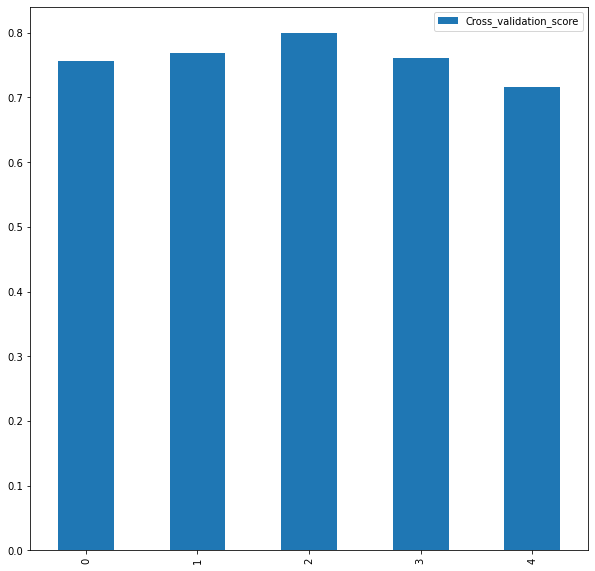

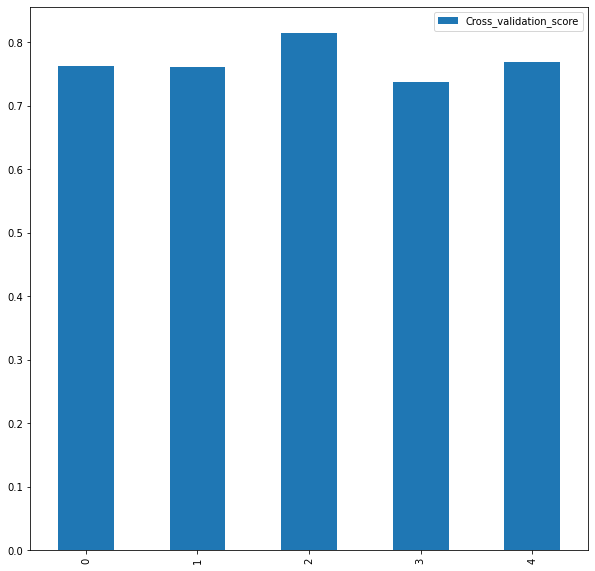

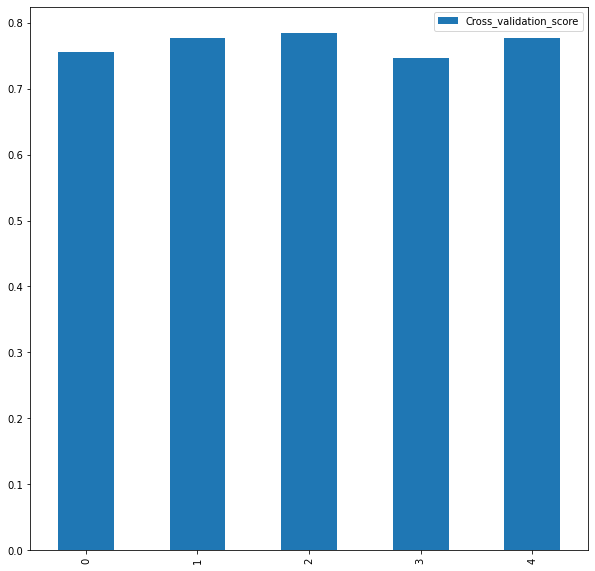

In [125]:
for r_f in rfs:
  score_arr = cross_val_score(r_f[0],X_train,Y_train.values.ravel(),cv=5)
  score_dataframe_rf = pd.DataFrame({'Cross_validation_score': score_arr})
  ax = score_dataframe_rf.plot.bar()
  print(score_dataframe_rf)
  print(" ")
  print("Mean of Cross Validation Scores of Model with max depth = "+str(r_f[2])+", max features = "+str(r_f[3])+", min samples = "+str(r_f[1])+" :- "+str(score_arr.mean()))
  print(" ")
  print("Standard Deviation of Cross Validation Scores of Model with max depth = "+str(r_f[2])+", max features = "+str(r_f[3])+", min samples = "+str(r_f[1])+" :- "+str(score_arr.std()))
  print(" ")

Finding the test accuracy of different random forests, according to varying parameters 

In [126]:
count = 0
for r_forest in rfs:
  count+=1
  r_forest[0].fit(X_train,Y_train.values.ravel())
  print("Test Accuracy of Model with max depth = "+str(r_forest[2])+", max features = "+str(r_forest[3])+", min samples = "+str(r_forest[1])+" :- "+str(r_forest[0].score(X_test,Y_test.values.ravel())*100)+"%")
  print(" ")

Test Accuracy of Model with max depth = 2, max features = 1, min samples = 3 :- 76.5432098765432%
 
Test Accuracy of Model with max depth = 2, max features = 2, min samples = 3 :- 77.77777777777779%
 
Test Accuracy of Model with max depth = 2, max features = 4, min samples = 3 :- 80.8641975308642%
 
Test Accuracy of Model with max depth = 3, max features = 1, min samples = 3 :- 76.5432098765432%
 
Test Accuracy of Model with max depth = 3, max features = 2, min samples = 3 :- 80.24691358024691%
 
Test Accuracy of Model with max depth = 3, max features = 4, min samples = 3 :- 80.24691358024691%
 
Test Accuracy of Model with max depth = 4, max features = 1, min samples = 3 :- 78.39506172839506%
 
Test Accuracy of Model with max depth = 4, max features = 2, min samples = 3 :- 80.24691358024691%
 
Test Accuracy of Model with max depth = 4, max features = 4, min samples = 3 :- 80.24691358024691%
 
Test Accuracy of Model with max depth = 5, max features = 1, min samples = 3 :- 79.62962962962

Plotting ROC-AUC Curve for Random Forest models of different parameter

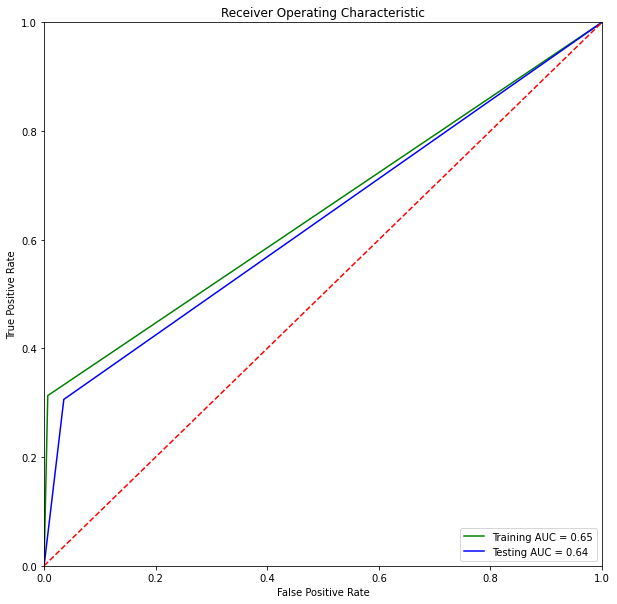

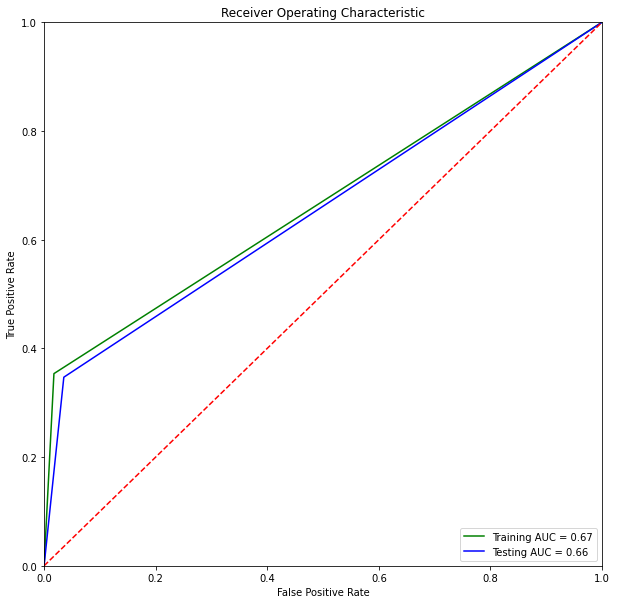

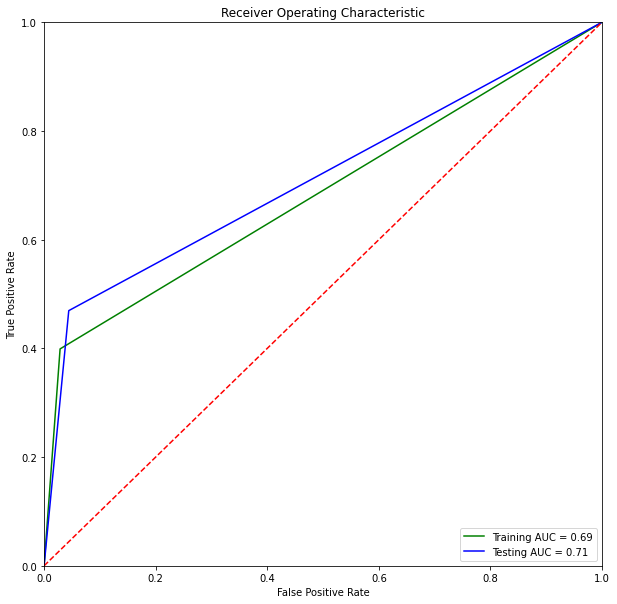

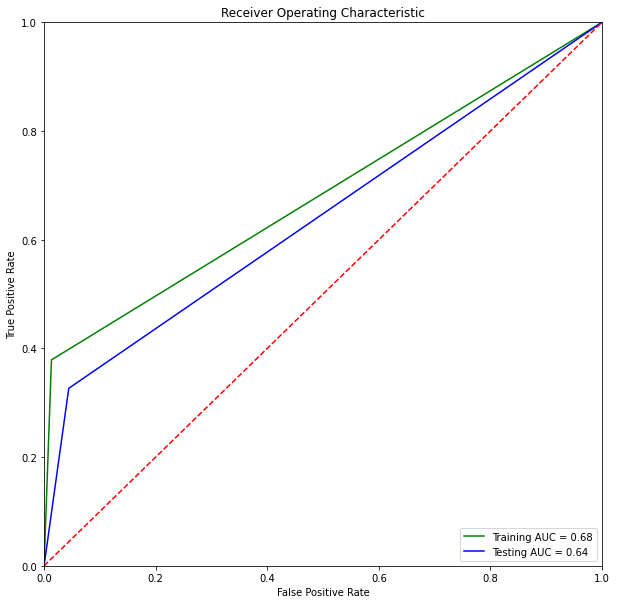

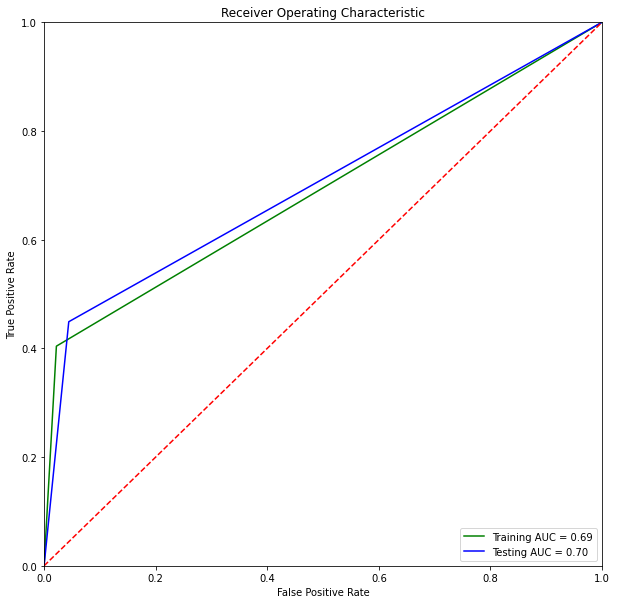

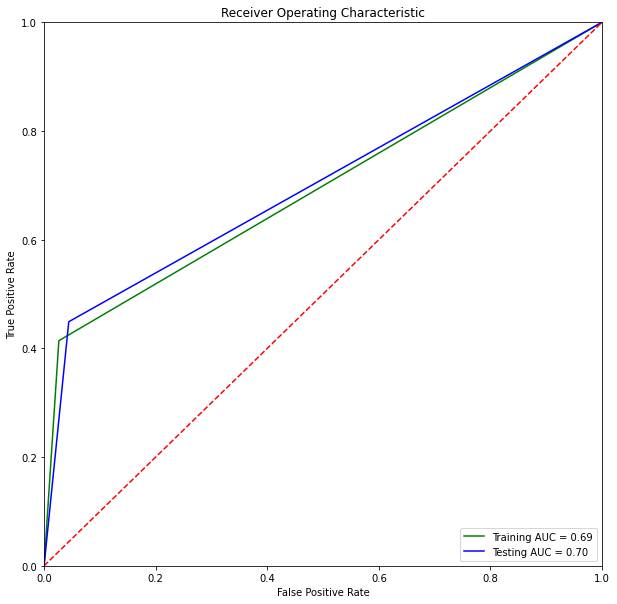

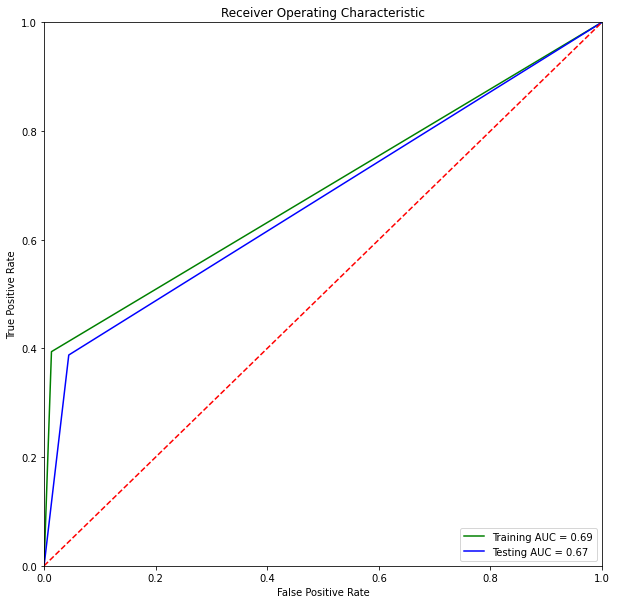

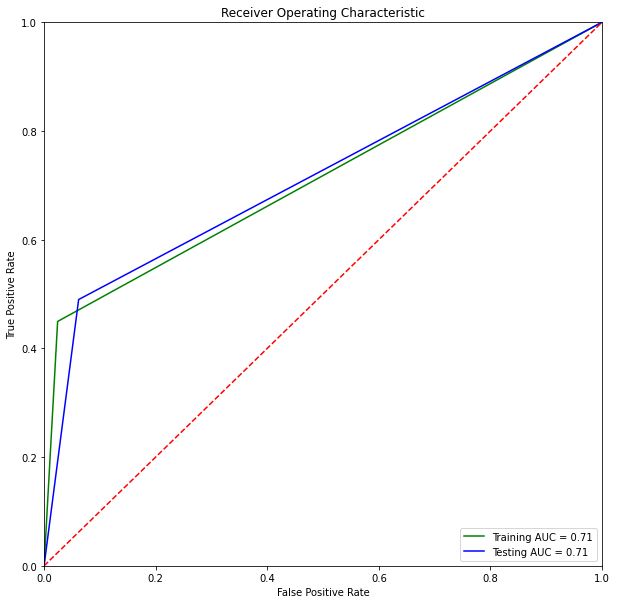

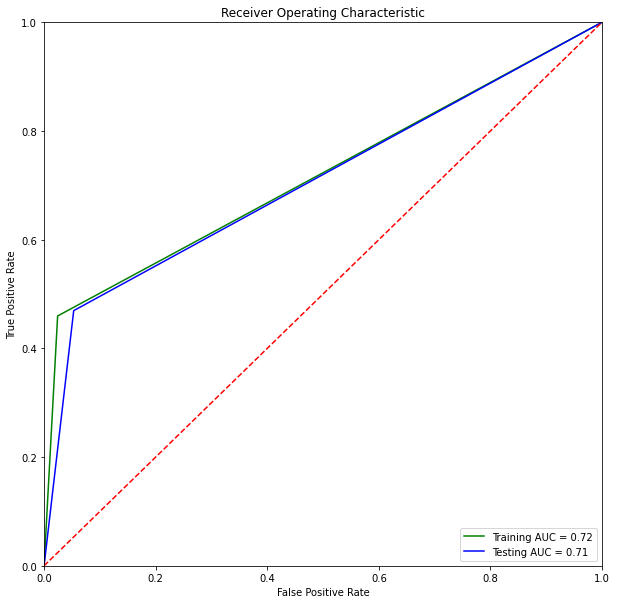

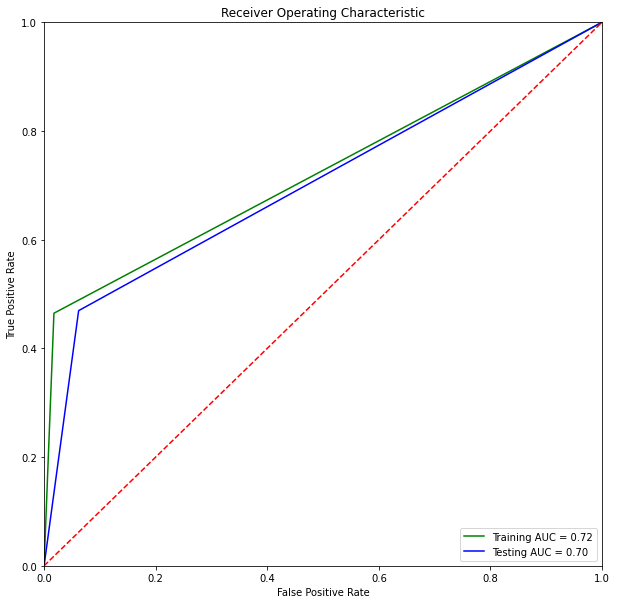

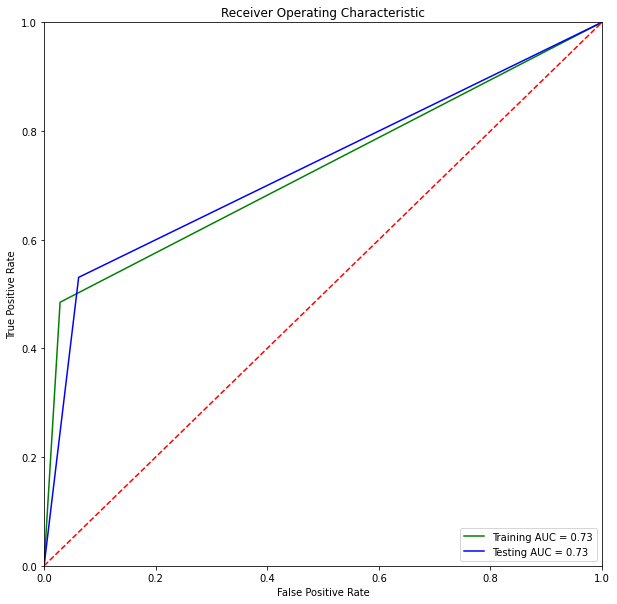

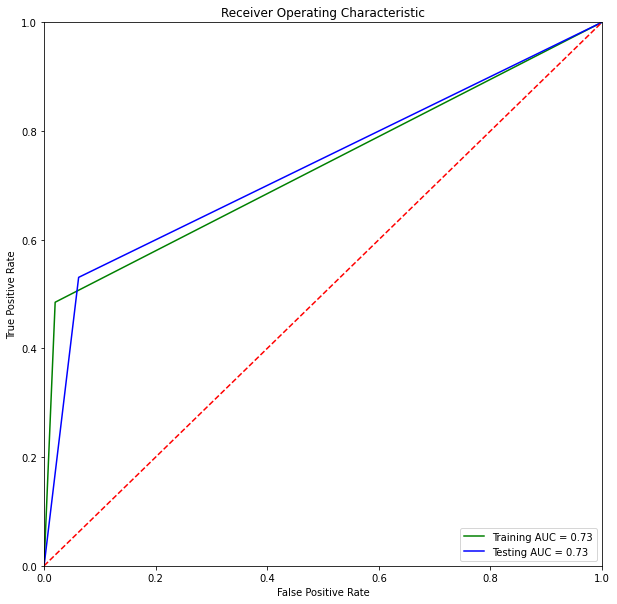

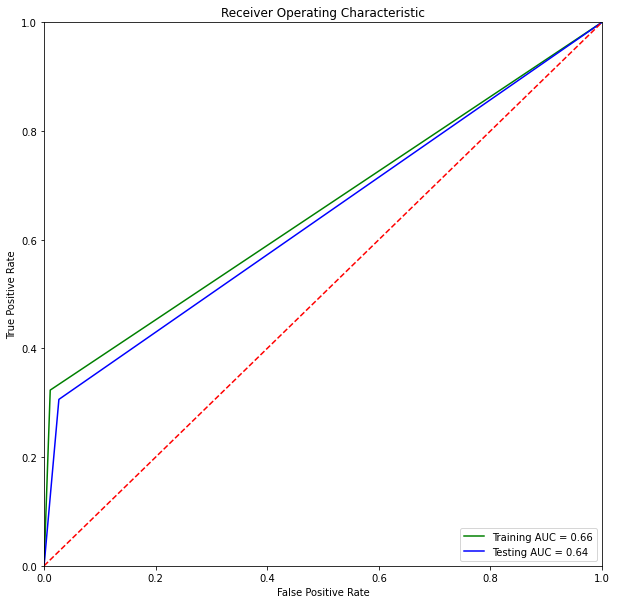

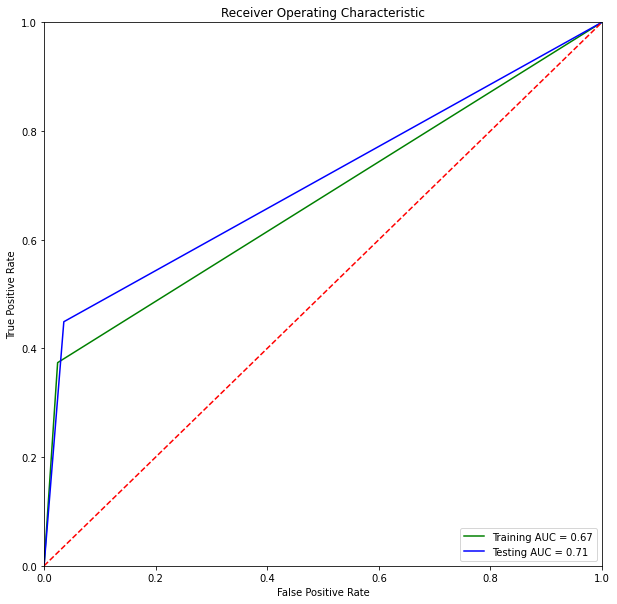

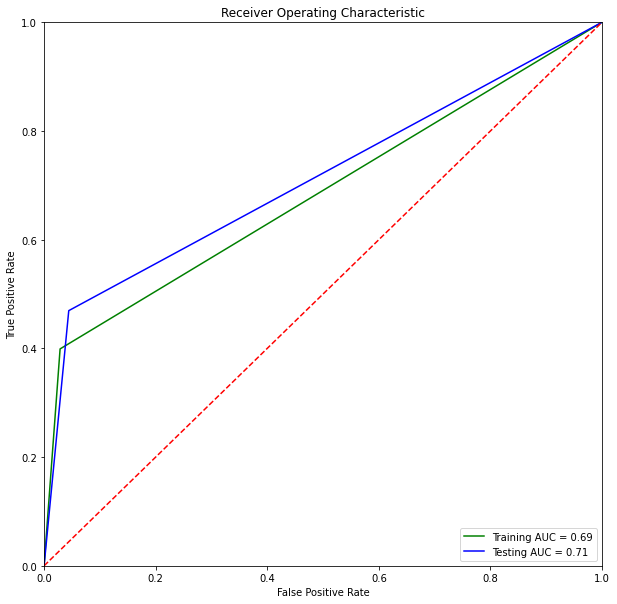

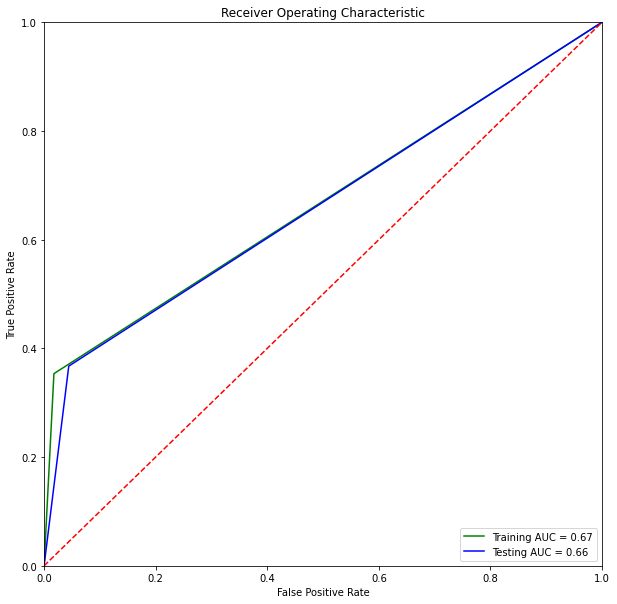

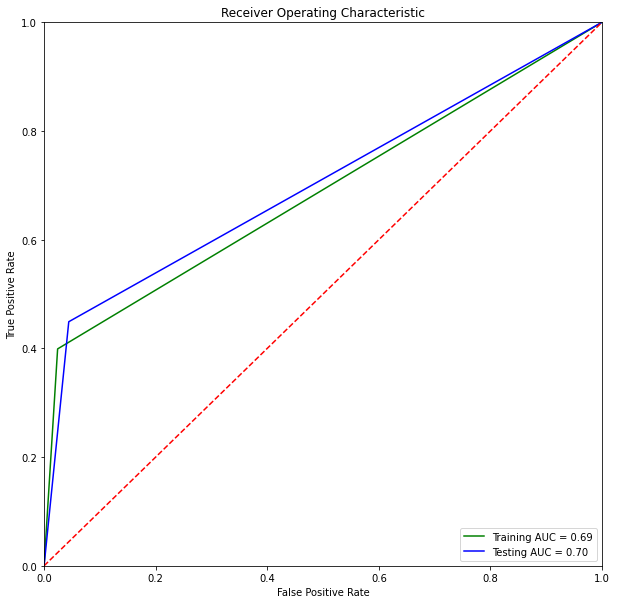

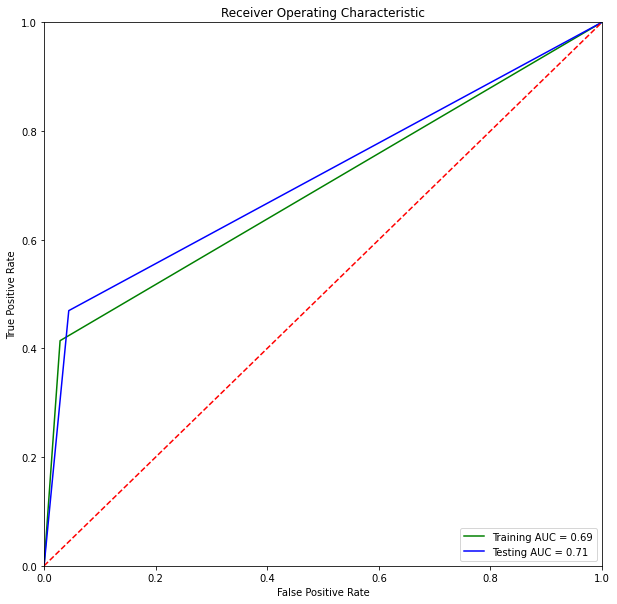

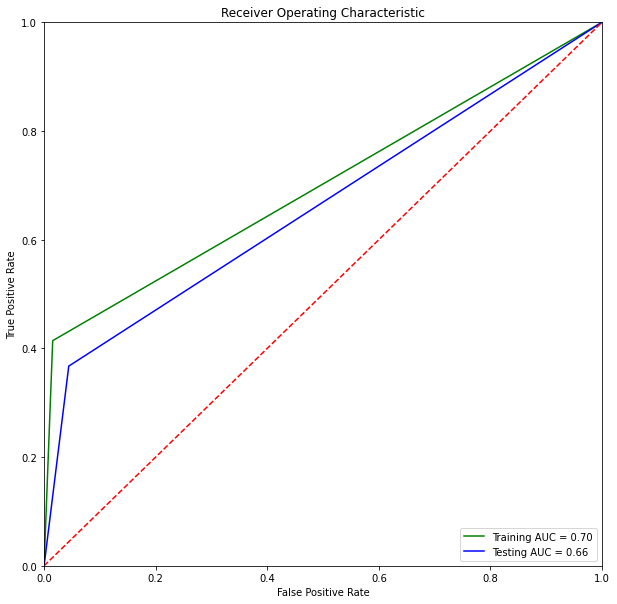

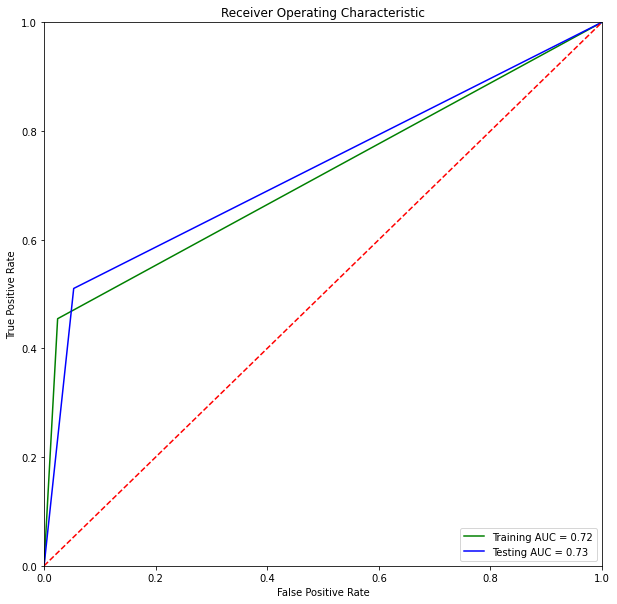

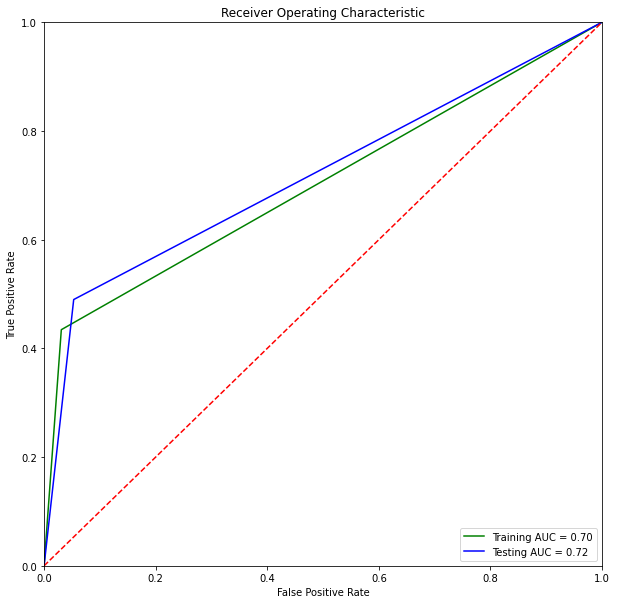

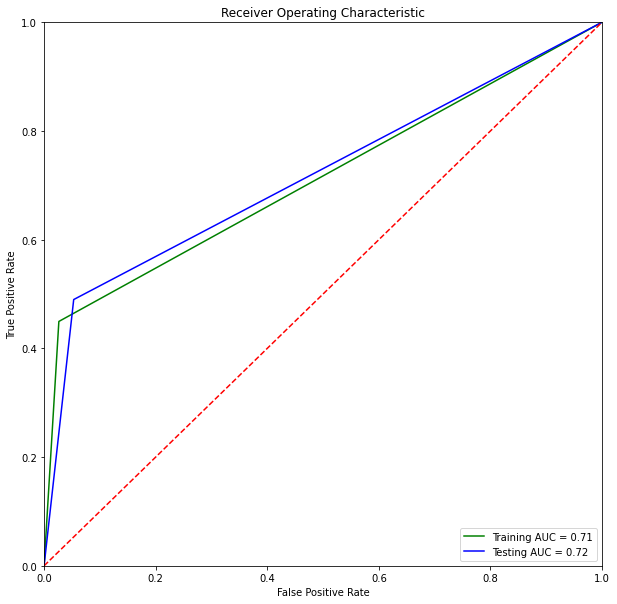

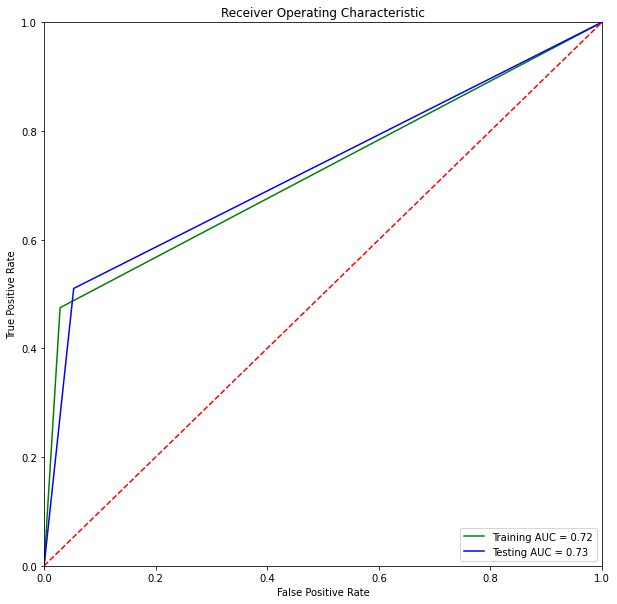

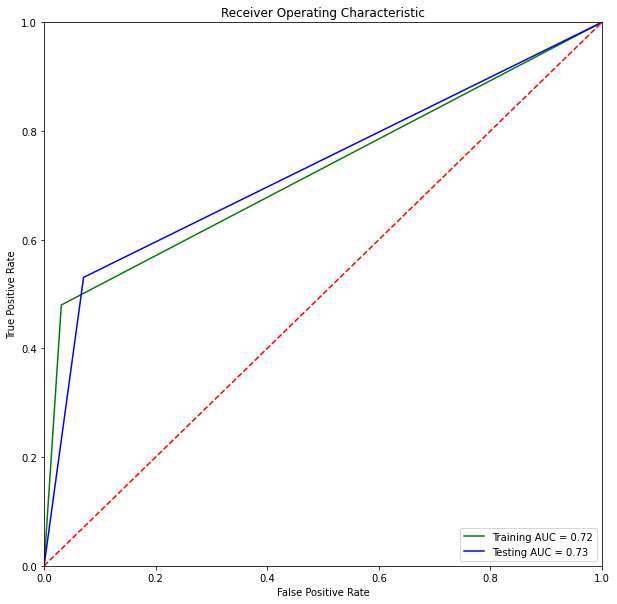

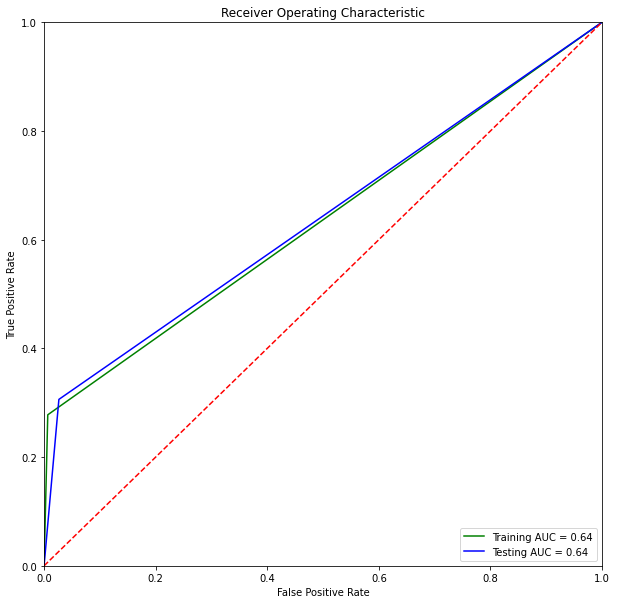

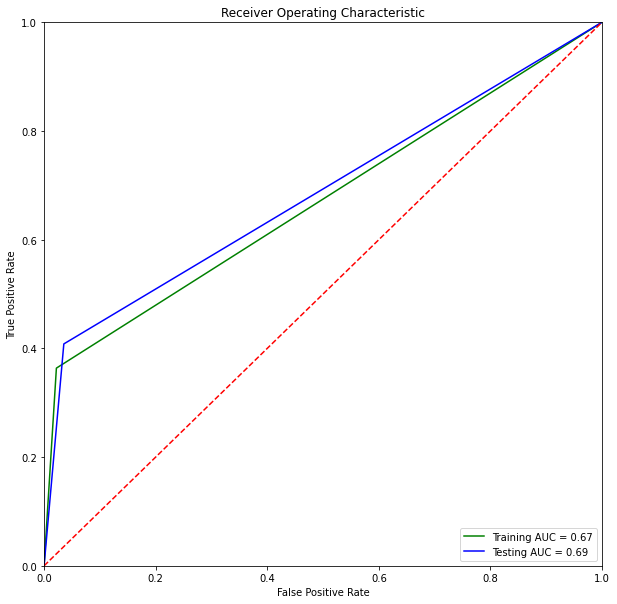

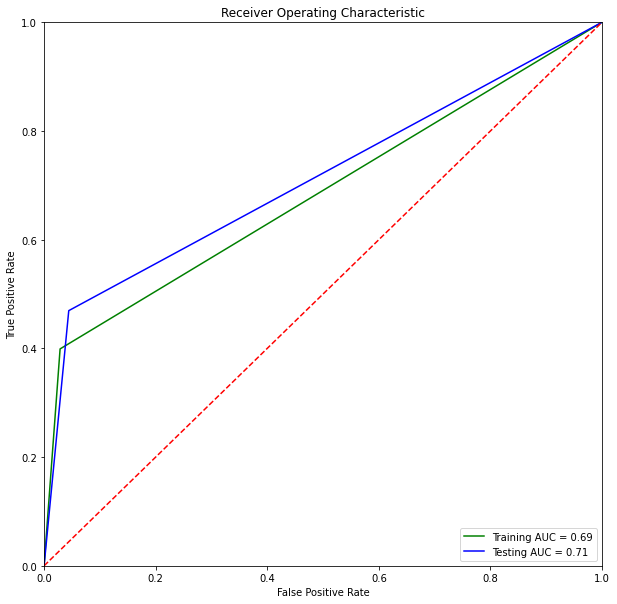

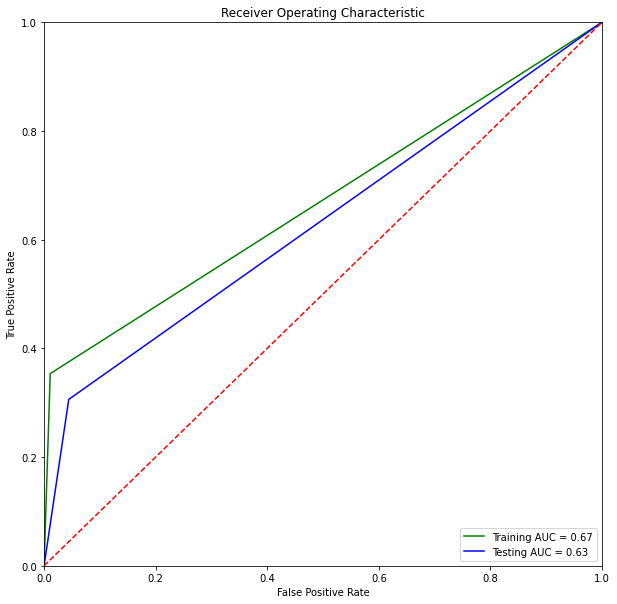

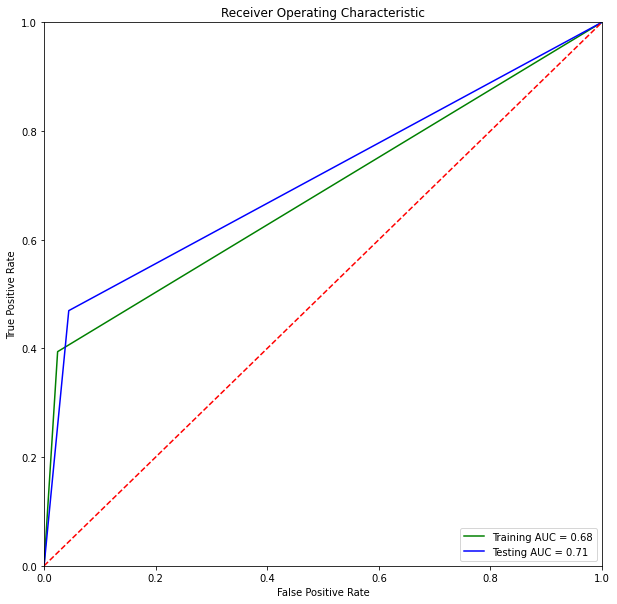

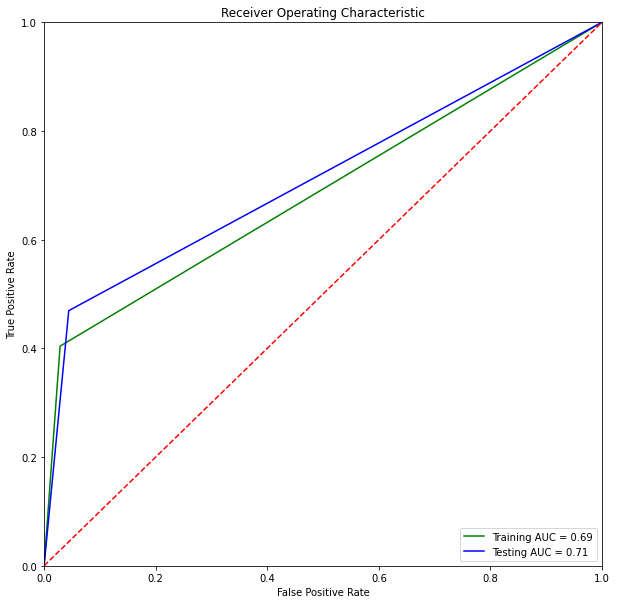

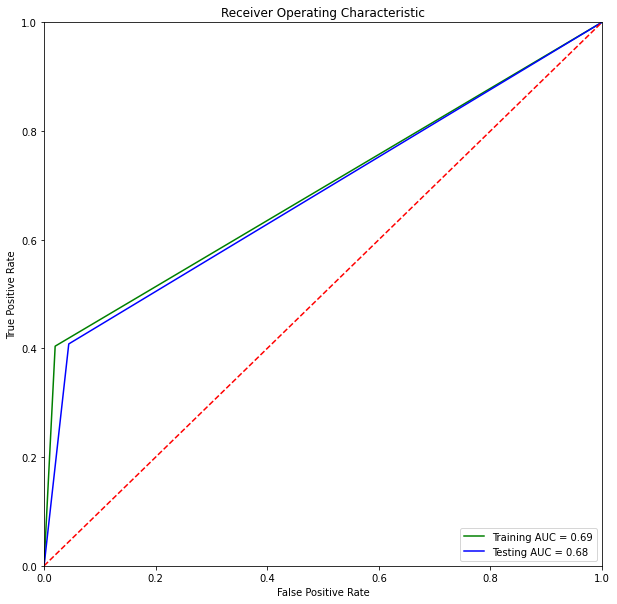

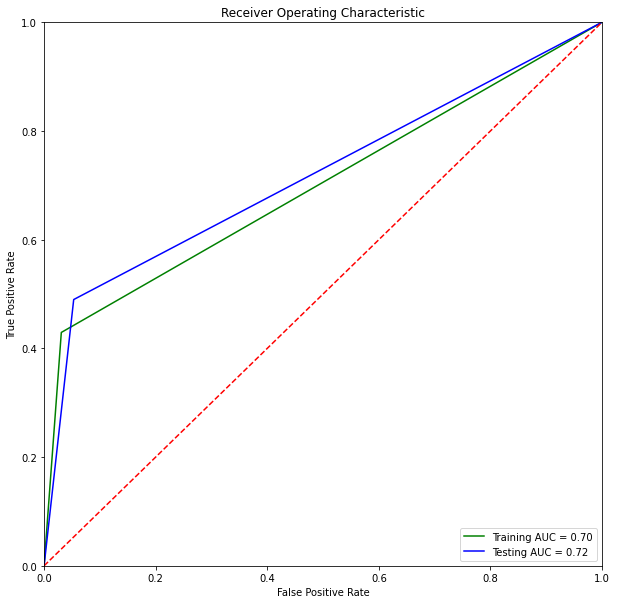

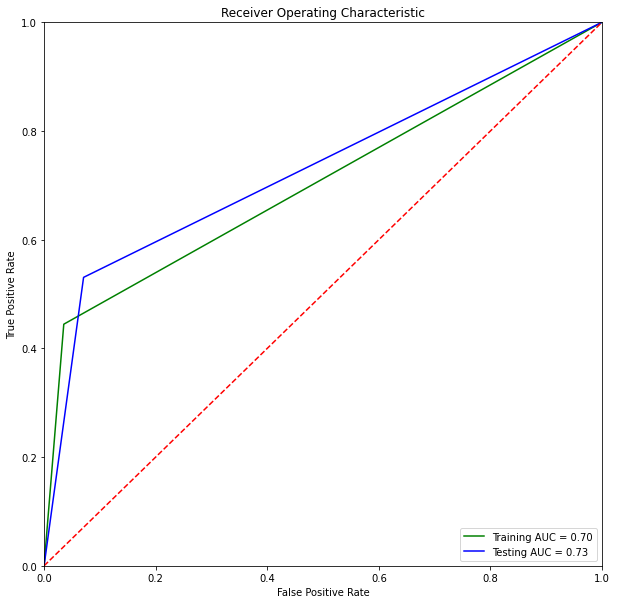

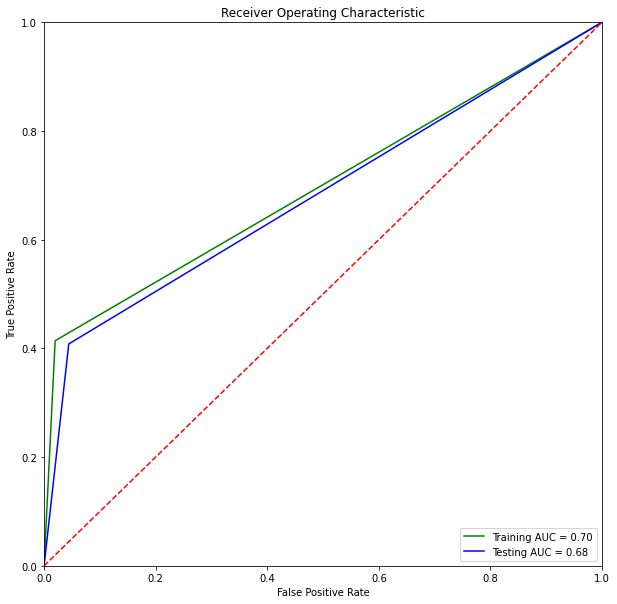

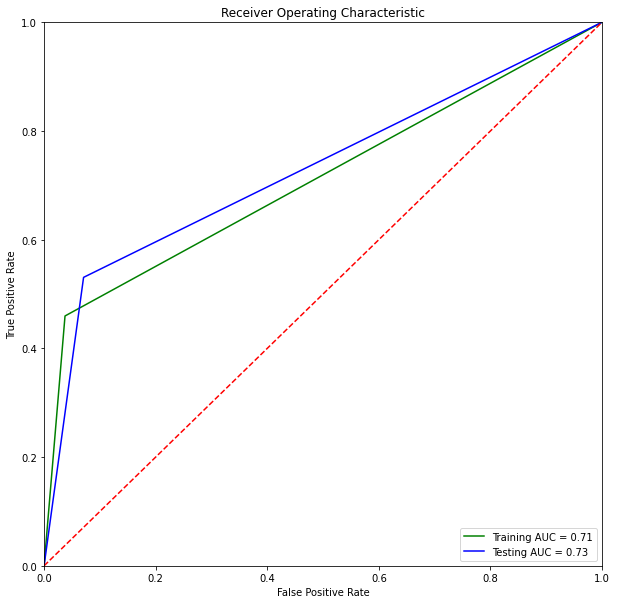

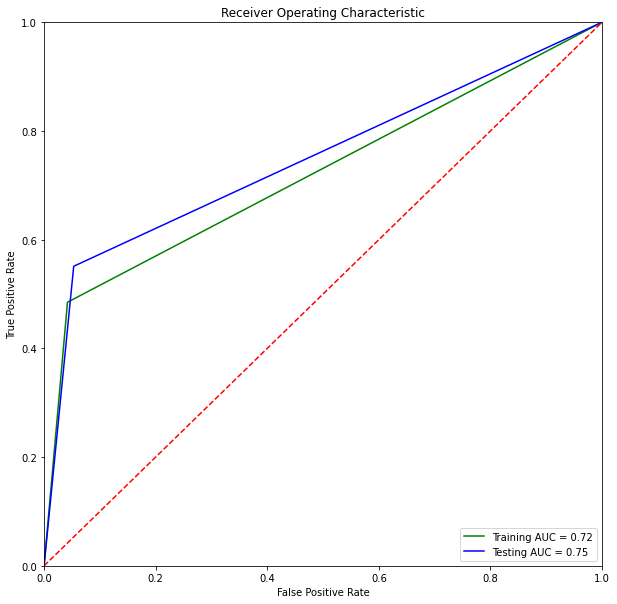

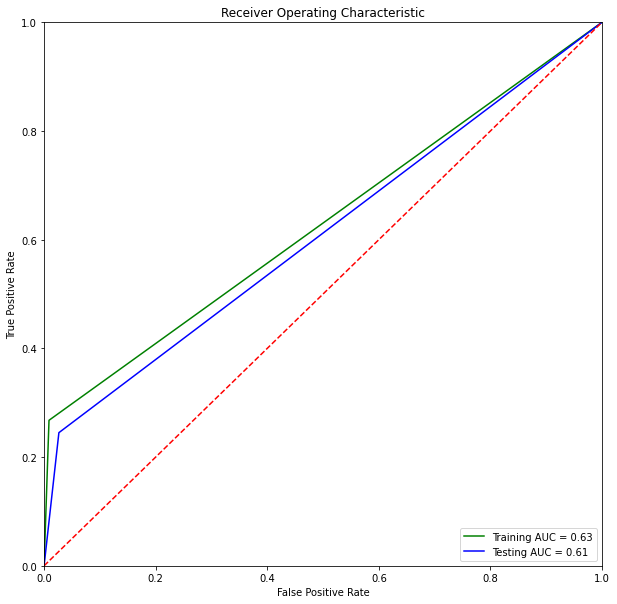

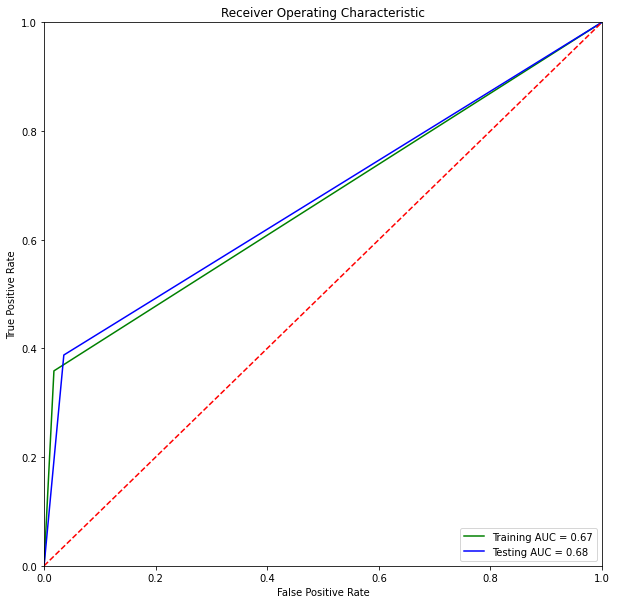

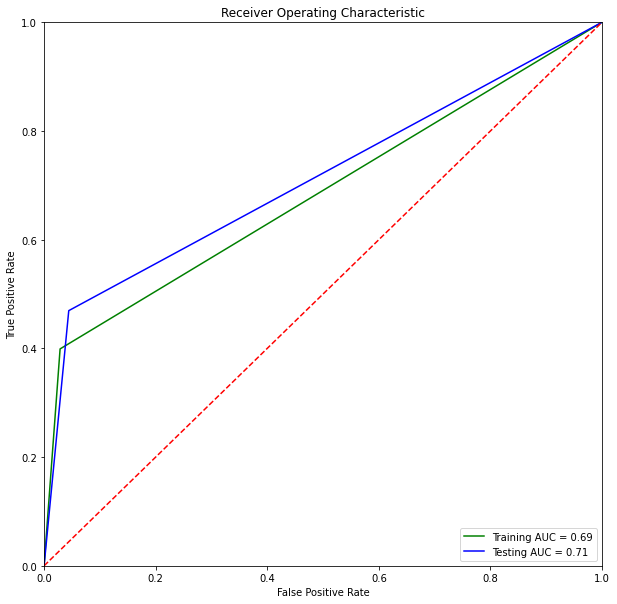

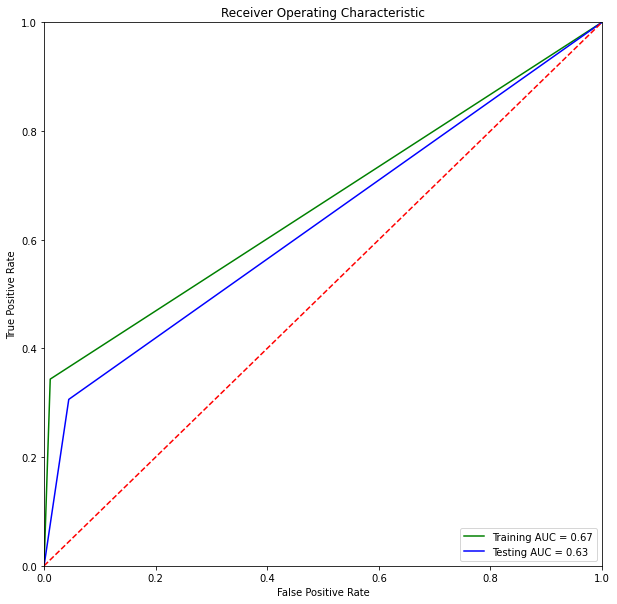

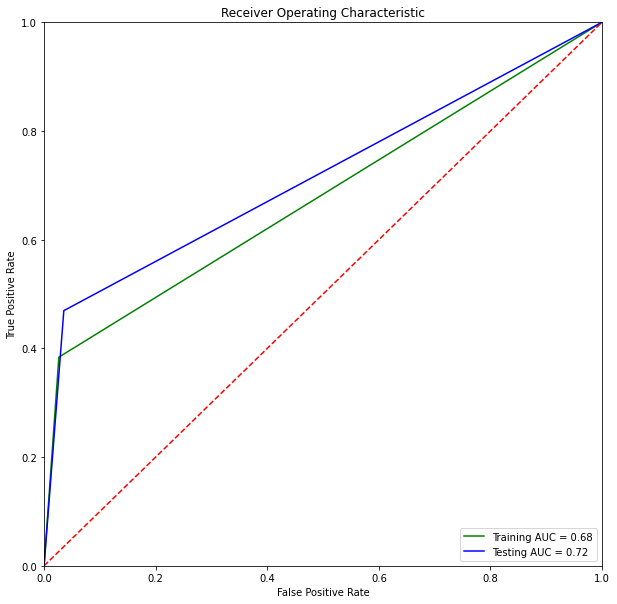

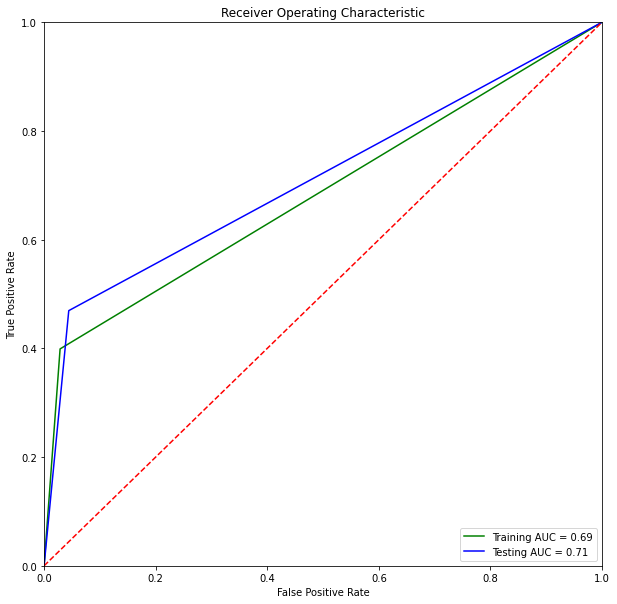

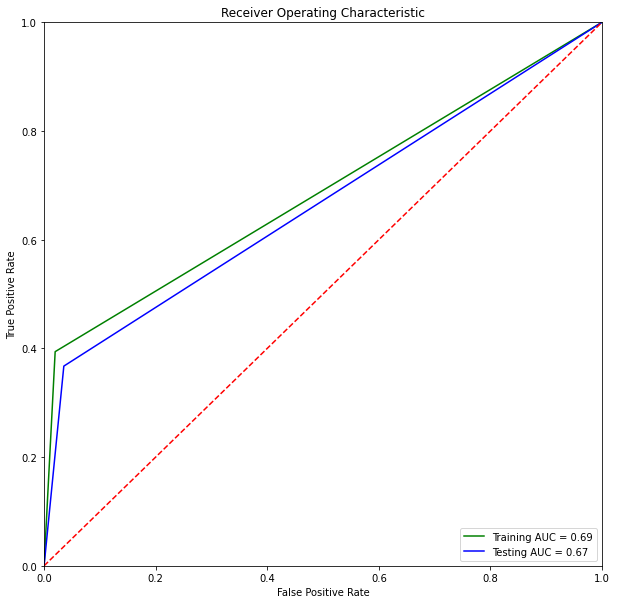

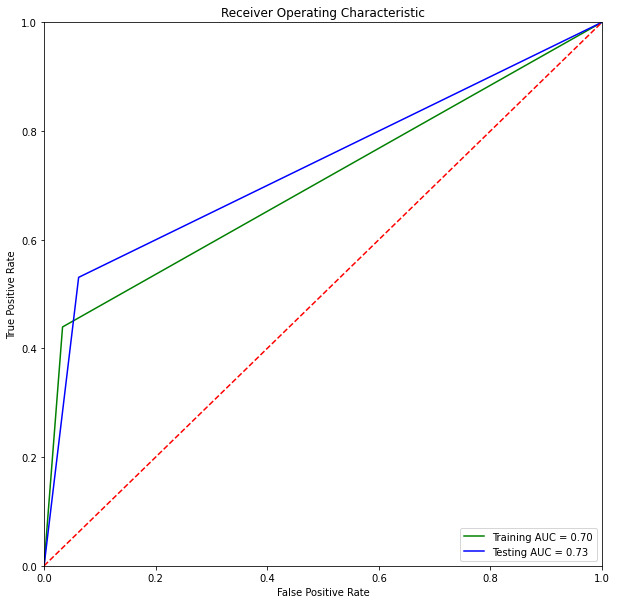

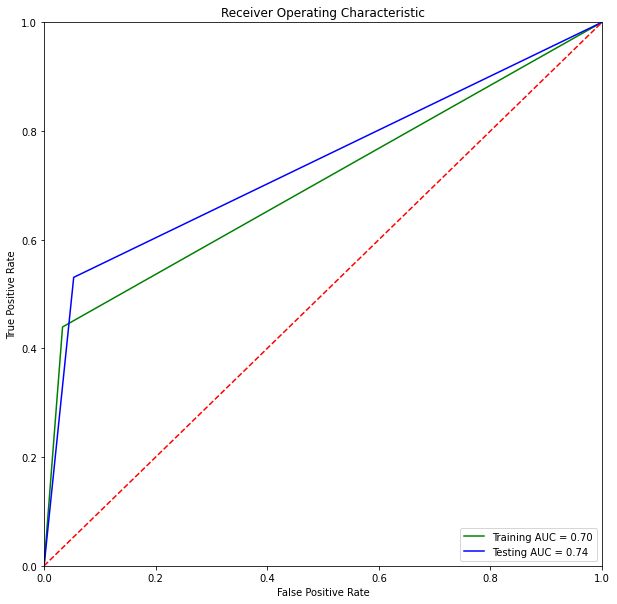

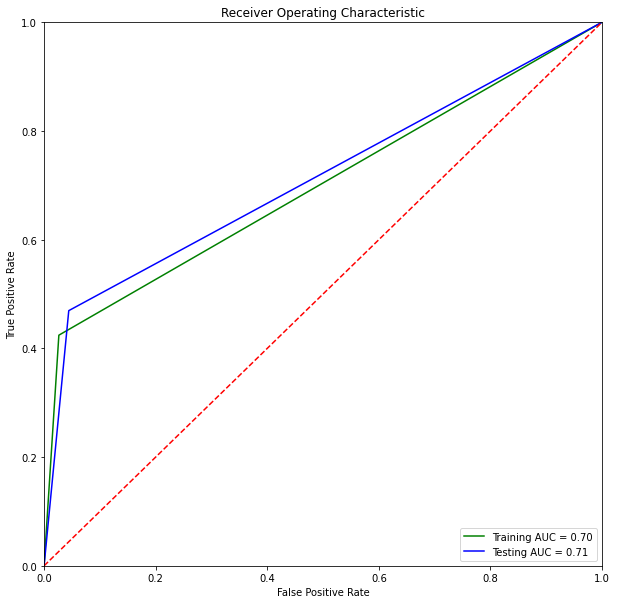

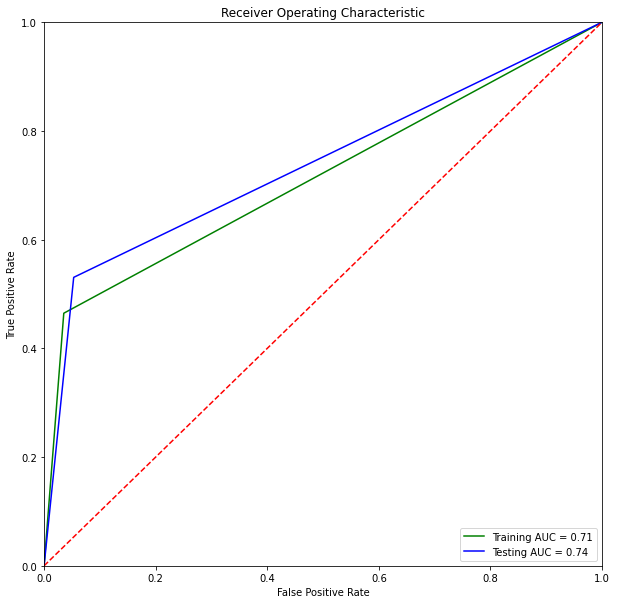

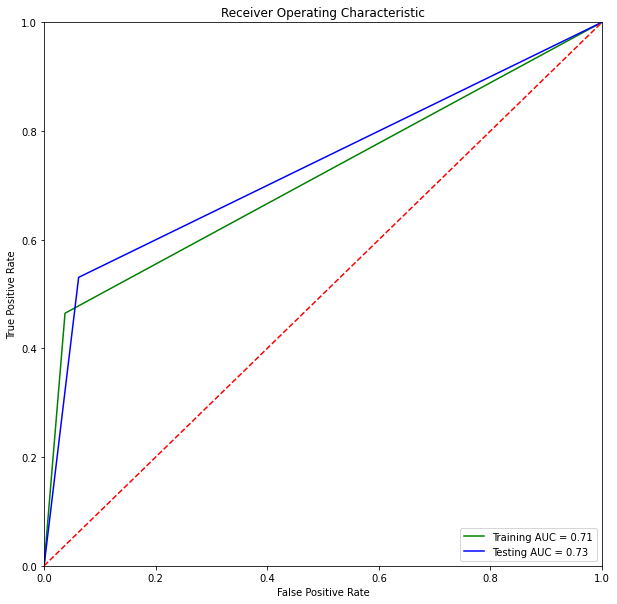

In [127]:
for r in rfs:
  y_pred_train = r[0].predict(X_train)
  y_pred_test = r[0].predict(X_test)

  fpr_tr, tpr_tr, threshold = roc_curve(Y_train.values.ravel(), y_pred_train)
  roc_auc_train = auc(fpr_tr, tpr_tr)

  fpr_ts, tpr_ts, threshold = roc_curve(Y_test.values.ravel(), y_pred_test)
  roc_auc_test = auc(fpr_ts, tpr_ts)

  plot_roc_curve(roc_auc_train, roc_auc_test)

Perform grid search amongst Random forest Models

In [128]:
grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search.fit(X_train,Y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                             

Get the best score from the grid search

In [149]:
print(grid_search.best_score_)
grid_search.cv_results_

0.8077439654362729


{'mean_fit_time': array([0.246383  , 0.23057098, 0.24152274, 0.23140578, 0.23515015,
        0.25045824, 0.23401046, 0.23271499, 0.23910217, 0.2393043 ,
        0.24055095, 0.24573431, 0.23032098, 0.23654995, 0.22956624,
        0.23550758, 0.23647242, 0.23399649, 0.23566179, 0.23508272,
        0.24948716, 0.25177774, 0.25248013, 0.24833822, 0.23479877,
        0.24226875, 0.23386135, 0.23401861, 0.24347692, 0.24302993,
        0.24107985, 0.2475431 , 0.25872493, 0.25822854, 0.26471734,
        0.25840802, 0.24154897, 0.24214478, 0.24009562, 0.23831477,
        0.26108789, 0.24619513, 0.24862251, 0.24691682, 0.26204996,
        0.26408749, 0.26504564, 0.24050736]),
 'mean_score_time': array([0.01869521, 0.02048459, 0.01852751, 0.01759939, 0.01768703,
        0.01916656, 0.01792431, 0.01756439, 0.01730938, 0.01762228,
        0.01724477, 0.01941805, 0.01831474, 0.01817632, 0.01825638,
        0.01952195, 0.01948504, 0.02063084, 0.01893582, 0.01864424,
        0.01762042, 0.01794081, 0.

Parameters for best model 

In [130]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 9}

ROC-AUC Plot for Best Random Forest Model

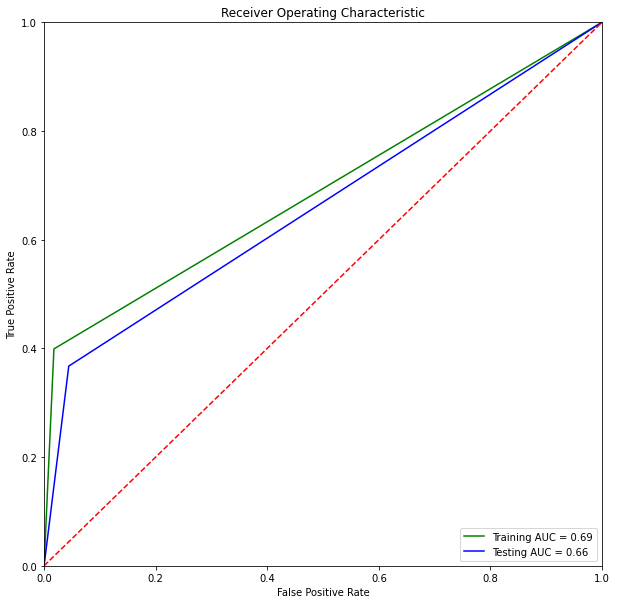

In [131]:
best_rf = grid_search.best_estimator_

y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

fpr_tr, tpr_tr, threshold = roc_curve(Y_train.values.ravel(), y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

fpr_ts, tpr_ts, threshold = roc_curve(Y_test.values.ravel(), y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

plot_roc_curve(roc_auc_train, roc_auc_test)

Find the feature which has the weakest impact in Random Forest Model

            Feature_impurity
Dependents          0.037409
 


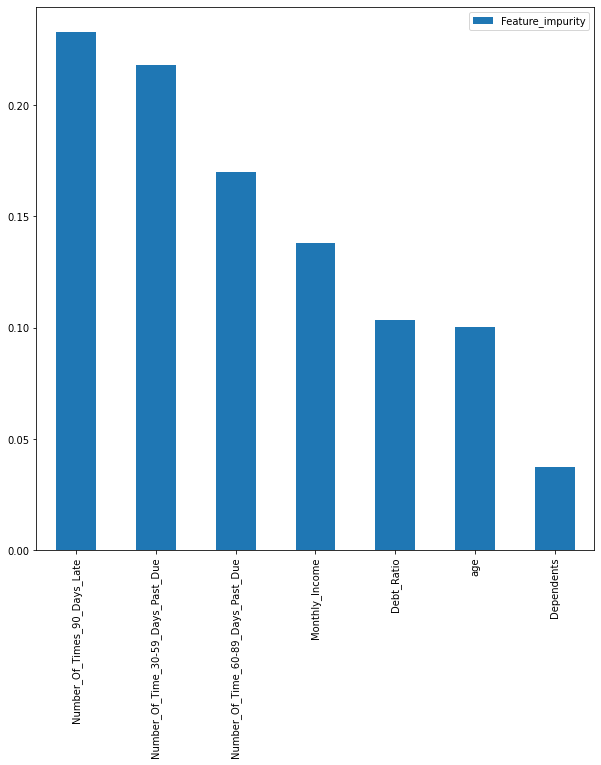

In [132]:
feature_rf = pd.DataFrame({'Feature_impurity': best_rf.feature_importances_}, index=dataset[X].columns).sort_values(by='Feature_impurity', ascending=False)
print(feature_rf[feature_rf['Feature_impurity']==min(best_rf.feature_importances_)])
print(" ")
ax = feature_rf.plot.bar()

Output plot for predicted values in Best Random Forest by Grid-Search

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


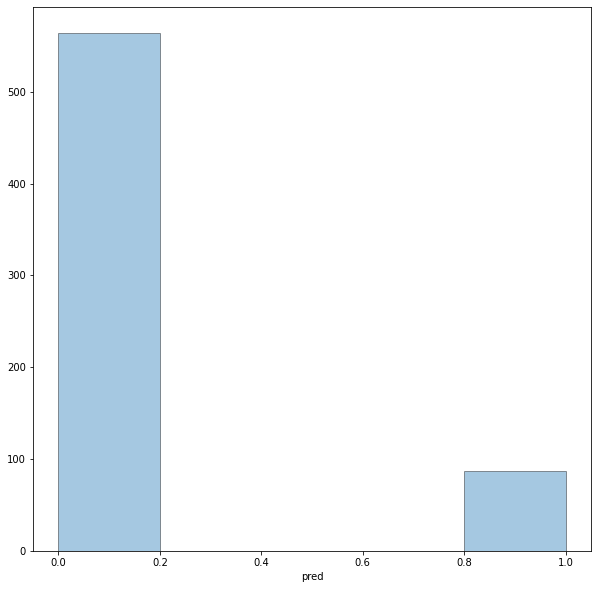

In [133]:
list(y_pred_train).append(y_pred_test)
pred = pd.DataFrame({'pred':y_pred_train})
sns.distplot(pred['pred'],hist=True,kde=False,bins=5,hist_kws={'edgecolor':'black'})

**Perform bagging classification using decision trees as the base classifier**

Get a list of models to evaluate Bagging Classifier, according to different parameters

In [134]:
def get_models(x,y):
  models=[]
  n_tree=[2,3,4]
  for i in n_tree:
    bag_classifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=i,random_state=17).fit(x,y)
    models.append([bag_classifier,i])
  return models

Evaluate a given model using cross-validation scores

In [135]:
def evaluate_model(model, X, y):
	scores = cross_val_score(model,X,y,cv=5)
	return scores,scores.mean(),scores.std()

Summarize the performance by getting mean and standard deviation of cross-validation scores

   Cross_validation_score
0                0.404580
1                0.553846
2                0.392308
3                0.684615
4                0.707692
 
Mean Score for Cross Validation of Model with no.of trees = 2  :- 0.5486083382266589
Standard Deviation for Cross Validation of Model with no.of trees = 2  :- 0.1334219403769261
 
   Cross_validation_score
0                0.366412
1                0.538462
2                0.338462
3                0.330769
4                0.730769
 
Mean Score for Cross Validation of Model with no.of trees = 3  :- 0.46097475044039926
Standard Deviation for Cross Validation of Model with no.of trees = 3  :- 0.1547244659018613
 
   Cross_validation_score
0                0.374046
1                0.692308
2                0.423077
3                0.692308
4                0.715385
 
Mean Score for Cross Validation of Model with no.of trees = 4  :- 0.5794245449207281
Standard Deviation for Cross Validation of Model with no.of trees = 4  :- 0.1487

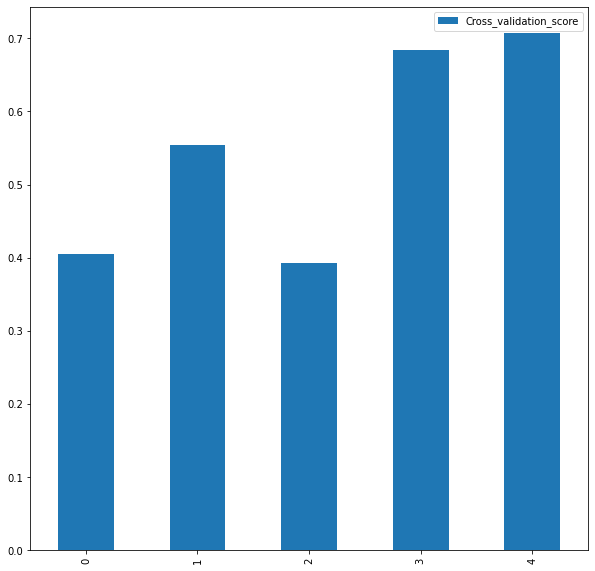

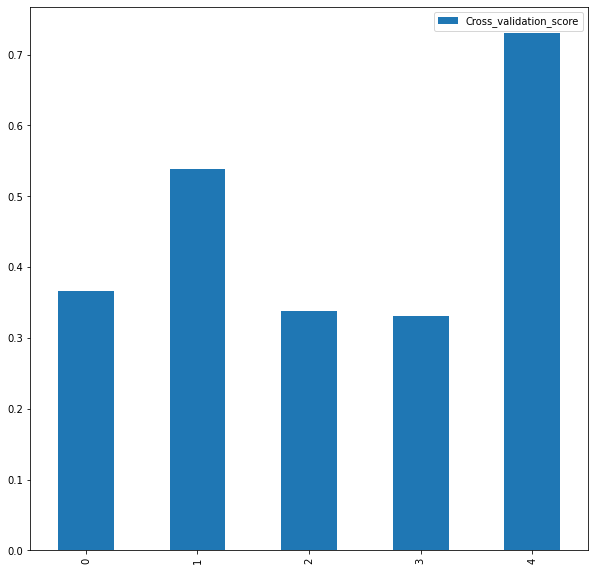

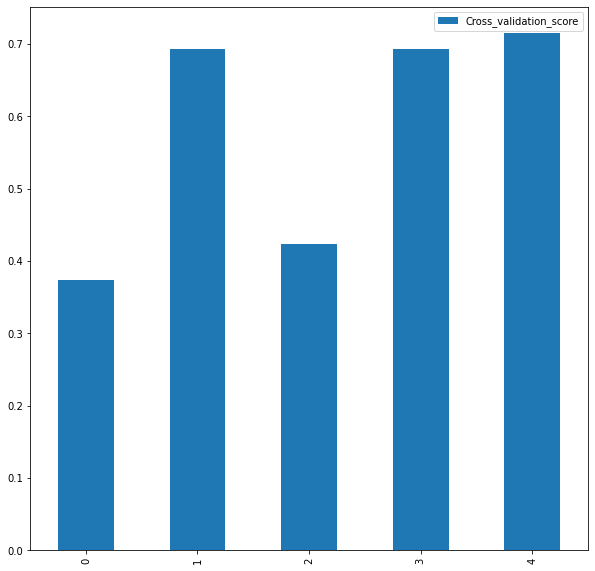

In [136]:
model_details_list =[]
models_list = get_models(X_train,Y_train.values.ravel())
for j in models_list:
  score_array,mean_scores,std_scores = evaluate_model(j[0],X_train,Y_train.values.ravel())
  score_dataframe_bg = pd.DataFrame({'Cross_validation_score': score_array})
  ax = score_dataframe_bg.plot.bar()
  model_details_list.append([score_dataframe_bg,mean_scores,std_scores])
  print(score_dataframe_bg)
  print(" ")
  print("Mean Score for Cross Validation of Model with no.of trees = "+str(j[1])+"  :- " + str(mean_scores))
  print("Standard Deviation for Cross Validation of Model with no.of trees = "+str(j[1])+"  :- " +str(std_scores))
  print(" ")

Test Accuracy for Bagging Classifiers of different n_trees

In [137]:
for m in models_list:
  print("Test Accuracy for Bagging Classifier with number of trees = "+str(m[1])+" :- "+str(m[0].score(X_test,Y_test.values.ravel())*100)+"%")
  print(" ")

Test Accuracy for Bagging Classifier with number of trees = 2 :- 74.07407407407408%
 
Test Accuracy for Bagging Classifier with number of trees = 3 :- 73.4567901234568%
 
Test Accuracy for Bagging Classifier with number of trees = 4 :- 77.77777777777779%
 


ROC-AUC Plots for Bagging Classifiers of different number of trees

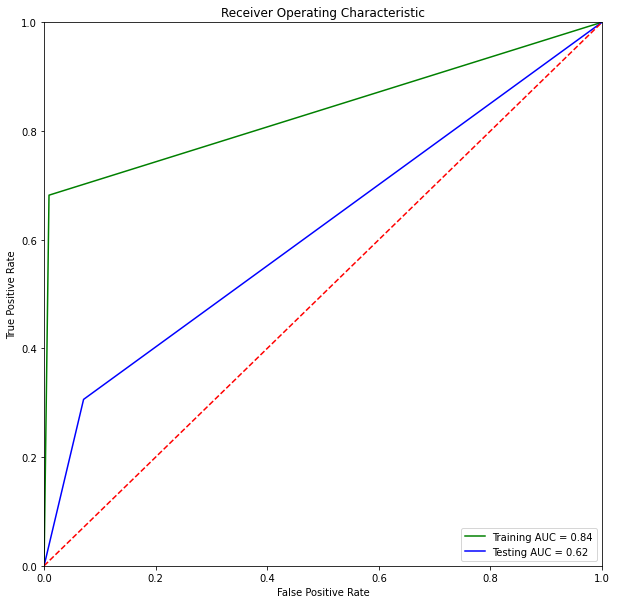

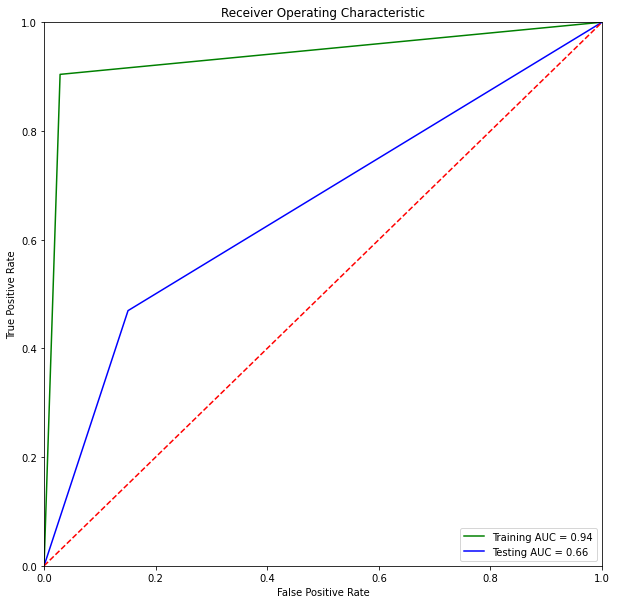

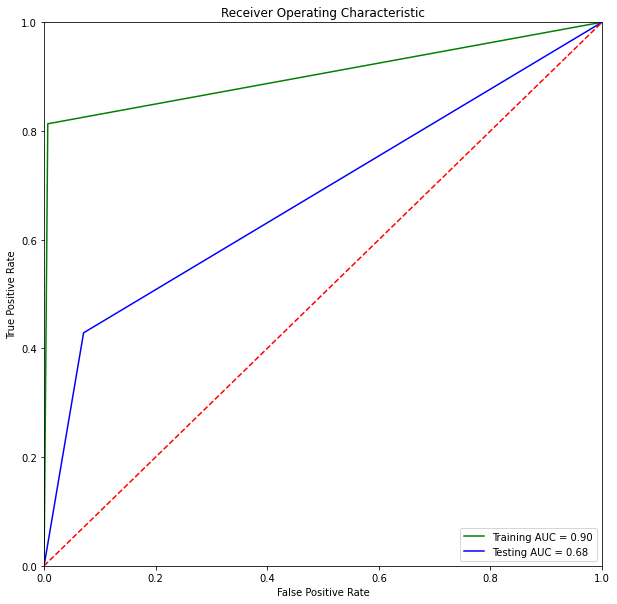

In [138]:
for bc in models_list:
  y_pred_train = bc[0].predict(X_train)
  y_pred_test = bc[0].predict(X_test)

  fpr_tr, tpr_tr, threshold = roc_curve(Y_train.values.ravel(), y_pred_train)
  roc_auc_train = auc(fpr_tr, tpr_tr)

  fpr_ts, tpr_ts, threshold = roc_curve(Y_test.values.ravel(), y_pred_test)
  roc_auc_test = auc(fpr_ts, tpr_ts)

  plot_roc_curve(roc_auc_train, roc_auc_test)

Plot the model performance for comparison of Bagging Classifiers using boxplot

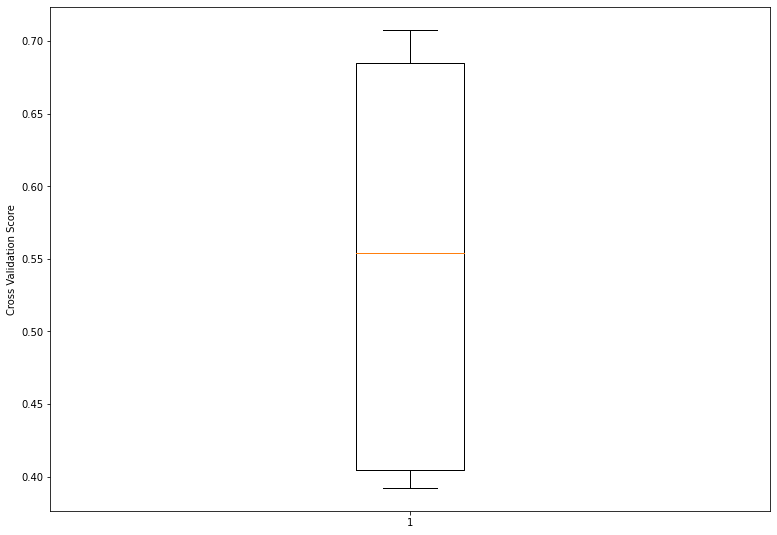

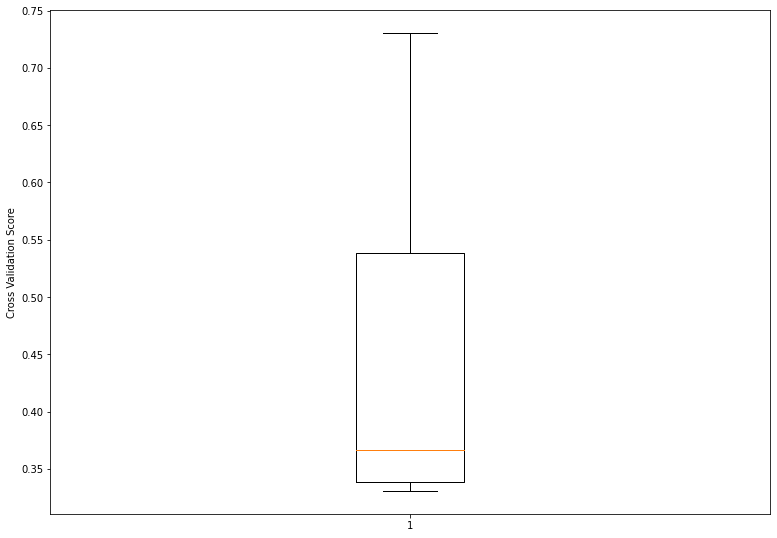

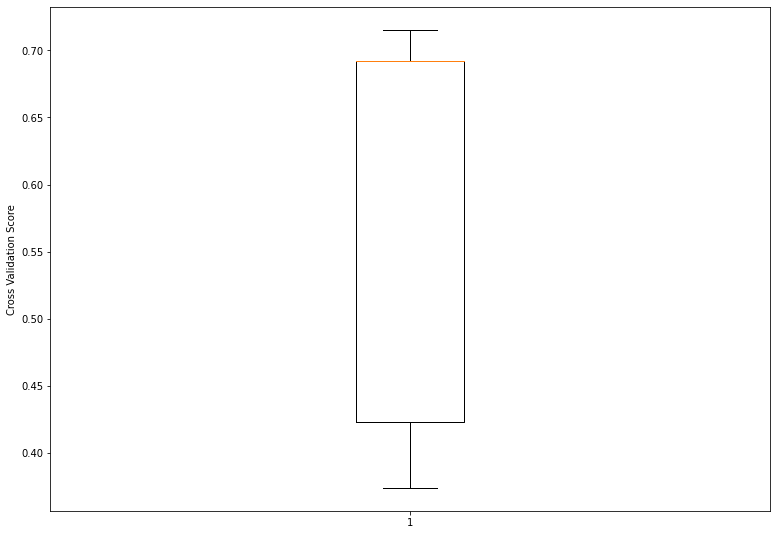

In [139]:
for k in model_details_list:
  fig = plt.figure(figsize =(10, 7))
  ax = fig.add_axes([0, 0, 1, 1]) 
  bp = ax.boxplot(k[0]['Cross_validation_score'])
  plt.ylabel("Cross Validation Score")
  plt.show() 

Perform Grid Search and Find the best model amongst Bagging Classifiers

In [140]:
parameters = {'n_estimators':[2,3,4]}
grid_search_bg = GridSearchCV(BaggingClassifier(), parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search_bg.fit(X_train,Y_train.values.ravel())
best_bg = grid_search_bg.best_estimator_

Get the best score 

In [150]:
print(grid_search_bg.best_score_)
grid_search_bg.cv_results_

0.7211072132995211


{'mean_fit_time': array([0.01123371, 0.01341338, 0.01540022]),
 'mean_score_time': array([0.00344691, 0.0035037 , 0.00350776]),
 'mean_test_score': array([0.68375777, 0.70012588, 0.72110721]),
 'param_n_estimators': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 2}, {'n_estimators': 3}, {'n_estimators': 4}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.67596154, 0.73200549, 0.72142857]),
 'split1_test_score': array([0.69861111, 0.68291667, 0.71444444]),
 'split2_test_score': array([0.68777778, 0.74166667, 0.71305556]),
 'split3_test_score': array([0.70681882, 0.64722457, 0.67526064]),
 'split4_test_score': array([0.64961961, 0.696816  , 0.78134686]),
 'std_fit_time': array([0.00143635, 0.0009419 , 0.00191055]),
 'std_score_time': array([8.06550848e-05, 3.35011956e-05, 6.26949380e-04]),
 'std_test_score': array([0.01997393, 0.03419827, 0.03417616]

Parameters for best model 

In [148]:
grid_search_bg.best_params_

{'n_estimators': 4}

ROC-AUC Plot for Best Bagging Classifier Model

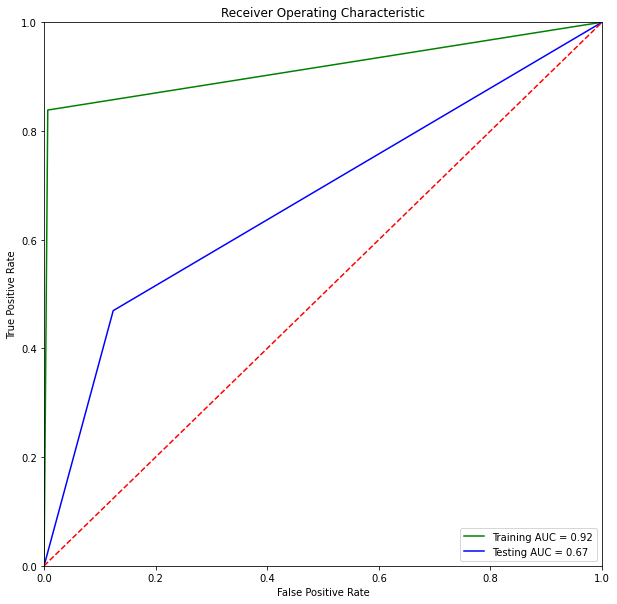

In [143]:
y_pred_train = best_bg.predict(X_train)
y_pred_test = best_bg.predict(X_test)

fpr_tr, tpr_tr, threshold = roc_curve(Y_train.values.ravel(), y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

fpr_ts, tpr_ts, threshold = roc_curve(Y_test.values.ravel(), y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

plot_roc_curve(roc_auc_train, roc_auc_test)

Output plot for Predicted Values by Best Bagging Classifier Model, chosen by grid-search

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


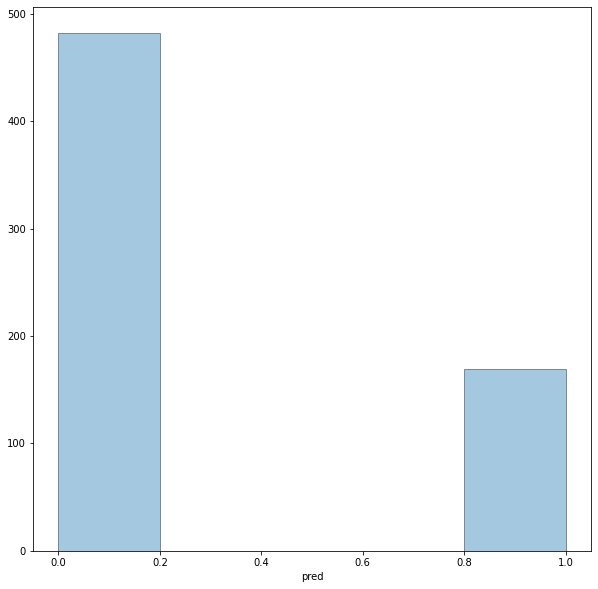

In [144]:
list(y_pred_train).append(y_pred_test)
pred_bg = pd.DataFrame({'pred':y_pred_train})
sns.distplot(pred_bg['pred'],hist=True,kde=False,bins=5,hist_kws={'edgecolor':'black'})

***Compare the best performance of bagging classifier with random forest***

   Cross_validation_score
0                0.778626
1                0.753846
2                0.815385
3                0.746154
4                0.730769
 
Mean score for cross validation scores in Random Forest = 0.7649559600704638
Standard Deviation for cross validation scores in Random Forest = 0.029582419639523374
 
Test Accuracy for Random Forest = 0.7777777777777778


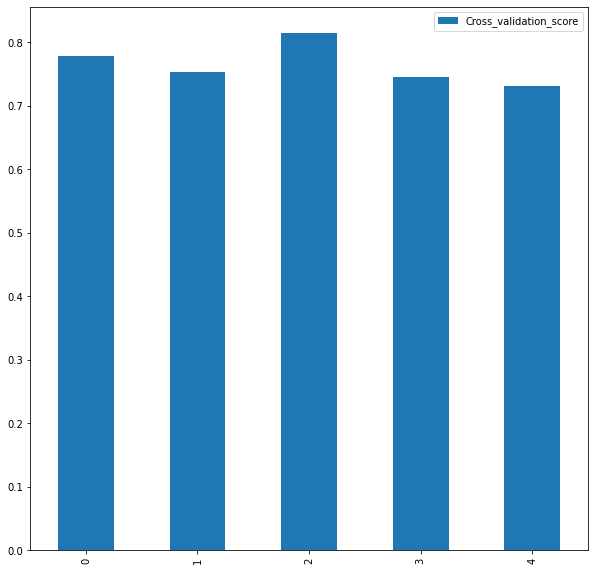

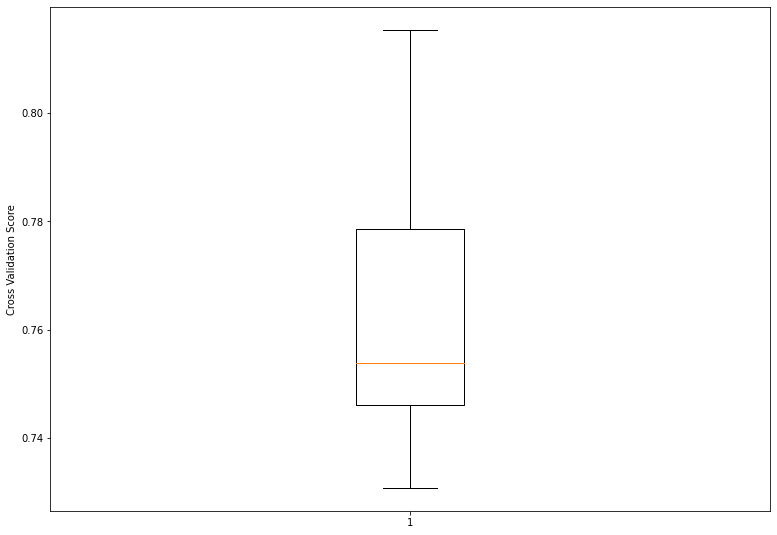

In [145]:
score_array_rf,mean_scores_rf,std_scores_rf = evaluate_model(best_rf,X_train,Y_train.values.ravel())
score_dataframe_rf = pd.DataFrame({'Cross_validation_score': score_array_rf})
ax_rf_bp = score_dataframe_rf.plot.bar()
print(score_dataframe_rf)
print(" ")
print("Mean score for cross validation scores in Random Forest = "+str(mean_scores_rf))
print("Standard Deviation for cross validation scores in Random Forest = "+str(std_scores_rf))
print(" ")
print("Test Accuracy for Random Forest = "+str(best_rf.score(X_test,Y_test.values.ravel())))
fig = plt.figure(figsize =(10, 7))
ax_rf = fig.add_axes([0, 0, 1, 1]) 
bp_rf = ax_rf.boxplot(score_dataframe_rf['Cross_validation_score'])
plt.ylabel("Cross Validation Score")
plt.show() 

 
Mean score for cross validation scores in Bagging Classifier = 0.6423018203170875
Standard Deviation for cross validation scores in Bagging Classifier = 0.0996524977633139
 
Test Accuracy for Bagging Classifier = 0.7530864197530864


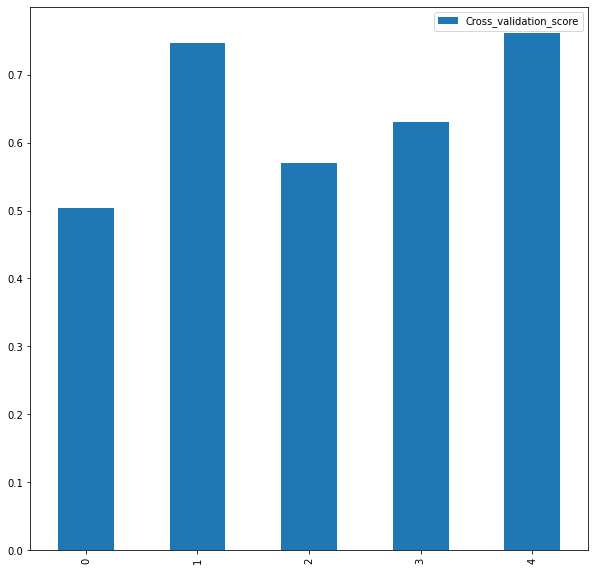

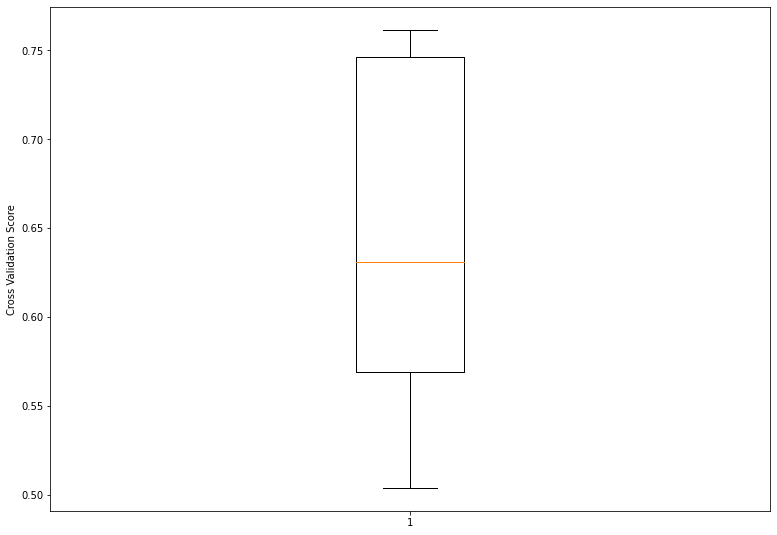

In [146]:
score_array_bg,mean_scores_bg,std_scores_bg = evaluate_model(best_bg,X_train,Y_train.values.ravel())
score_dataframe_bg = pd.DataFrame({'Cross_validation_score': score_array_bg})
ax_bag_bp = score_dataframe_bg.plot.bar()
print(" ")
print("Mean score for cross validation scores in Bagging Classifier = "+str(mean_scores_bg))
print("Standard Deviation for cross validation scores in Bagging Classifier = "+str(std_scores_bg))
print(" ")
print("Test Accuracy for Bagging Classifier = "+str(best_bg.score(X_test,Y_test.values.ravel())))
fig_b = plt.figure(figsize =(10, 7))
ax_b = fig_b.add_axes([0, 0, 1, 1]) 
bp_b = ax_b.boxplot(score_dataframe_bg['Cross_validation_score'])
plt.ylabel("Cross Validation Score")
plt.show()

Dataframe, passed by User, to check Prediction of Models

In [103]:
dic = {'Serious_Dlq_in_2yrs':1,'Debt_Ratio':0.24,'age':23,'Number_Of_Time_30-59_Days_Past_Due':0,'Number_Of_Time_60-89_Days_Past_Due':0,'Number_Of_Times_90_Days_Late':0,'Monthly_Income':78,'Dependents':0}
data = pd.DataFrame(dic,index=[0])
data

,Serious_Dlq_in_2yrs,Debt_Ratio,age,Number_Of_Time_30-59_Days_Past_Due,Number_Of_Time_60-89_Days_Past_Due,Number_Of_Times_90_Days_Late,Monthly_Income,Dependents
0,1,0.24,23,0,0,0,78,0


Predictions for the Dataframe "data" , by Random Forest and Bagging Classifier

In [147]:
y_bg = best_bg.predict(x_pred)
y_rf = best_rf.predict(x_pred)
print("Actual Value = ",y_pred.values.ravel())
print("Predicted Value by Bagging Classifier = " , y_bg)
print("Predicted Value by Random Forest = " , y_rf)

Actual Value =  [1]
Predicted Value by Bagging Classifier =  [0]
Predicted Value by Random Forest =  [0]


References:-


*   [Decision Tree](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
*   [Seaborn](https://https://https://seaborn.pydata.org/)
*   [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
*   [Stratified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
*   [Grid Search](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
*   [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) 
*   [Cross Val Score](https://https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)









